# Plots for the GALAH DR4 Paper

Author: Sven Buder (ANU, sven.buder@anu.edu.au)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-in-Catalogues" data-toc-modified-id="Read-in-Catalogues-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read in Catalogues</a></span></li><li><span><a href="#Target-Information" data-toc-modified-id="Target-Information-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Target Information</a></span><ul class="toc-item"><li><span><a href="#Gaia-DR3-parallaxes-and-RVs" data-toc-modified-id="Gaia-DR3-parallaxes-and-RVs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gaia DR3 parallaxes and RVs</a></span></li><li><span><a href="#How-many-Open-Cluster?" data-toc-modified-id="How-many-Open-Cluster?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>How many Open Cluster?</a></span></li><li><span><a href="#How-many-Globular-Cluster?" data-toc-modified-id="How-many-Globular-Cluster?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>How many Globular Cluster?</a></span></li><li><span><a href="#How-many-large-survey-targets?" data-toc-modified-id="How-many-large-survey-targets?-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>How many large survey targets?</a></span></li><li><span><a href="#Skymap" data-toc-modified-id="Skymap-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Skymap</a></span></li><li><span><a href="#SNR-distribution-and-change-wrt.-DR3" data-toc-modified-id="SNR-distribution-and-change-wrt.-DR3-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>SNR distribution and change wrt. DR3</a></span></li></ul></li><li><span><a href="#Spectrum-analysis" data-toc-modified-id="Spectrum-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Spectrum analysis</a></span></li><li><span><a href="#Comparison-to-DR3-and-APOGEE-DR17" data-toc-modified-id="Comparison-to-DR3-and-APOGEE-DR17-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparison to DR3 and APOGEE DR17</a></span></li><li><span><a href="#Table-Schema" data-toc-modified-id="Table-Schema-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Table Schema</a></span></li><li><span><a href="#Flag_SP" data-toc-modified-id="Flag_SP-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Flag_SP</a></span></li><li><span><a href="#Zero-Point-shifts" data-toc-modified-id="Zero-Point-shifts-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Zero Point shifts</a></span></li><li><span><a href="#Overview-of-what's-in-GALAH-DR4" data-toc-modified-id="Overview-of-what's-in-GALAH-DR4-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Overview of what's in GALAH DR4</a></span><ul class="toc-item"><li><span><a href="#Stellar-parameters-and-abundances" data-toc-modified-id="Stellar-parameters-and-abundances-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Stellar parameters and abundances</a></span></li><li><span><a href="#[C/N]" data-toc-modified-id="[C/N]-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>[C/N]</a></span></li><li><span><a href="#Globular-Clusters" data-toc-modified-id="Globular-Clusters-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Globular Clusters</a></span></li></ul></li><li><span><a href="#Dynamic-overview" data-toc-modified-id="Dynamic-overview-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Dynamic overview</a></span></li></ul></div>

In [1]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import matplotlib.patches as mpatches

from astropy.table import Table, join
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord, ICRS

import imageio as iio
import corner

## Read in Catalogues

In [2]:
# GALAH DR4 allstar and allspec
galah_dr4_allstar = Table.read('../catalogs/galah_dr4_allstar.fits')
galah_dr4_allspec = Table.read('../catalogs/galah_dr4_allspec.fits')

In [3]:
# GALAH DR3 allstar for reference
galah_dr3_allstar = Table.read('/Users/buder/GALAH_DR3/catalogs/GALAH_DR3_main_allstar_v2.fits')

In [4]:
# Open and Globular Cluster membership catalogues
ocs = Table.read('../auxiliary_information/CantatGaudin_2020_AandA_640_1.fits')
gcs = Table.read('../auxiliary_information/VasilievBaumgardt_2021_MNRAS_505_5978_cluster_source_id_memberprob0p7.fits')

# prepare joining with common keys
ocs['gaiadr3_source_id'] = ocs['GaiaDR2']
gcs['gaiadr3_source_id'] = gcs['source_id']

# join
ocs_dr4 = join(ocs, galah_dr4_allstar, keys = 'gaiadr3_source_id')
gcs_dr4 = join(gcs, galah_dr4_allstar, keys = 'gaiadr3_source_id')

## Target Information

### Gaia DR3 parallaxes and RVs

In [8]:
# astrometric information from Gaia DR3?
dr4_allstar_with_parallax = len(galah_dr4_allstar['gaiadr3_source_id'][np.isfinite(galah_dr4_allstar['parallax'])])
print('Stars with Gaia DR3 parallaxes: ', dr4_allstar_with_parallax, np.round(100*dr4_allstar_with_parallax/len(galah_dr4_allstar['parallax'])))

# Average parallax uncertainty?
parallax_perc = np.nanpercentile(np.array(100*galah_dr4_allstar['parallax_error']/galah_dr4_allstar['parallax']),q=[16,50,84])
print('Parallax uncertainty: r$'+str(np.round(parallax_perc[1],1))+'_{-'+str(np.round(parallax_perc[1]-parallax_perc[0],1))+'}^{+'+str(np.round(parallax_perc[2]-parallax_perc[1],1))+'}$')

# RVs from Gaia DR3?
dr4_allstar_with_gaia_rv = len(galah_dr4_allstar['gaiadr3_source_id'][np.isfinite(galah_dr4_allstar['rv_gaia_dr3'])])
print('Stars with Gaia DR3 RVs: ', dr4_allstar_with_gaia_rv, np.round(100*dr4_allstar_with_gaia_rv/len(galah_dr4_allstar['parallax'])))

Stars with Gaia DR3 parallaxes:  911754 99.0
Parallax uncertainty: r$1.6_{-0.9}^{+2.6}$
Stars with Gaia DR3 RVs:  849867 93.0


### How many Open Cluster?

In [9]:
nr_clusters = len(np.unique(ocs_dr4['Cluster']))
nr_clusters_above_5members = 0

for unique_oc in np.unique(ocs_dr4['Cluster']):
    match = len(np.where(unique_oc == ocs_dr4['Cluster'])[0])
    if match >= 5:
        nr_clusters_above_5members +=  1
    
print('OCs: '+str(nr_clusters)+' ('+str(nr_clusters_above_5members)+' with 5+ members)')

print('OC members in total: '+str(len(ocs_dr4['sobject_id'])))

OCs: 361 (109 with 5+ members)
OC members in total: 3756


### How many Globular Cluster?

In [10]:
nr_clusters = len(np.unique(gcs_dr4['cluster']))
nr_clusters_above_5members = 0

for unique_gc in np.unique(gcs_dr4['cluster']):
    match = len(np.where(unique_gc == gcs_dr4['cluster'])[0])
    if match >= 5:
        nr_clusters_above_5members +=  1
    
print('GCs: '+str(nr_clusters)+' ('+str(nr_clusters_above_5members)+' with 5+ members)')

print('GC members in total: '+str(len(gcs_dr4['sobject_id'])))

GCs: 30 (23 with 5+ members)
GC members in total: 2509


### How many large survey targets?

In [11]:
total_targets = len(galah_dr4_allstar['sobject_id'])

for survey in [
    'galah_bright',
    'galah_main',
    'galah_faint',
    'galah_phase2',
    'k2_hermes',
    'tess_hermes',
    'globular clusters',
    'open clusters',
    'commissioning',
    'others'
]:
    
    if survey == 'globular clusters':
        target_number = len(gcs_dr4['sobject_id']) # matched with Vasiliev and Baumgardt (2021) members
        total_targets -= target_number
    elif survey == 'open clusters':
        target_number = len(ocs_dr4['sobject_id']) # matched with Cantat-Gaudin et al. (2020) members
        total_targets -= target_number
    elif survey == 'commissioning':
        target_number = 2625
        total_targets -= target_number
    else:
        if survey == 'others':
            target_number = total_targets # the remaining targets
        else:
            target_number = len(np.where(galah_dr4_allstar['survey_name'] == survey)[0])
            total_targets -= target_number
    
    print(survey, target_number)

galah_bright 67680
galah_main 434901
galah_faint 33907
galah_phase2 172494
k2_hermes 117736
tess_hermes 37129
globular clusters 2509
open clusters 3756
commissioning 2625
others 44851


### Skymap

In [12]:
# Put ra/dec coordinates into SkyCoord and to l/b
coordinates = SkyCoord(frame=ICRS, ra=galah_dr4_allstar['ra']*u.deg, dec=galah_dr4_allstar['dec']*u.deg)
galah_dr4_l = coordinates.galactic.l.wrap_at(180 * u.deg).radian
galah_dr4_b = coordinates.galactic.b.radian

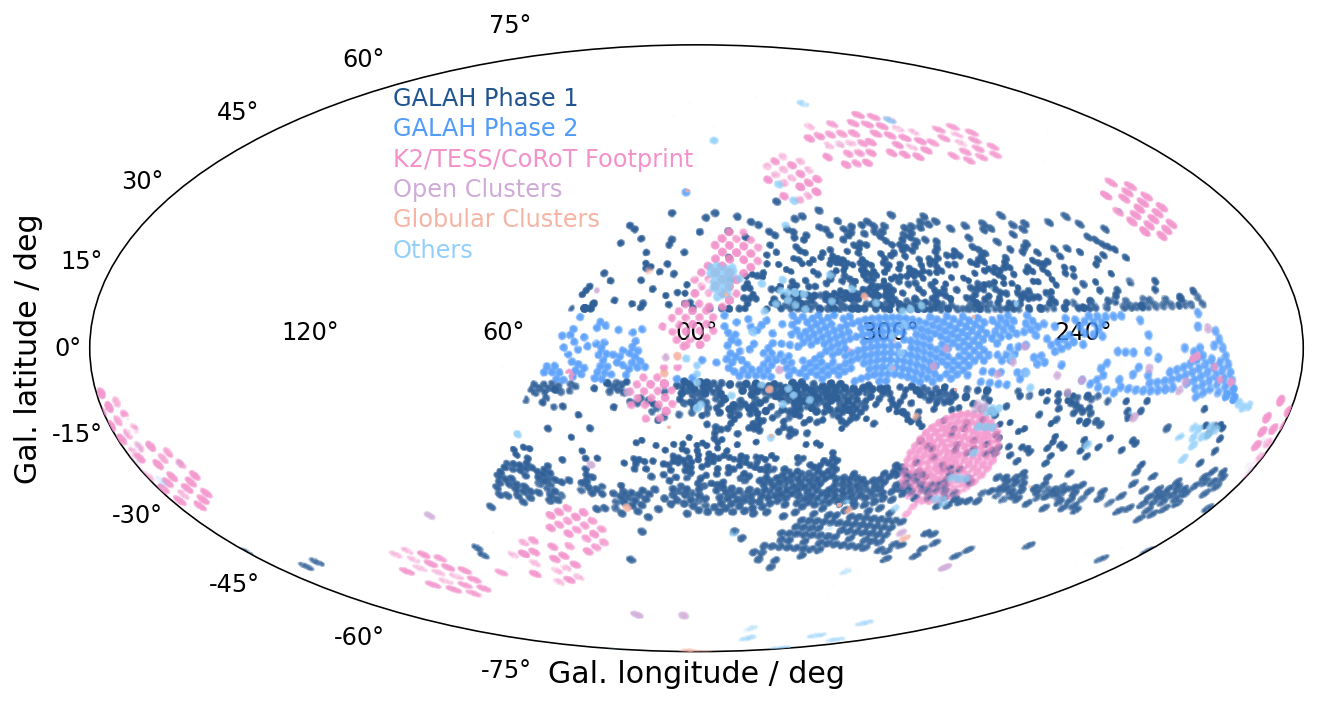

In [18]:
unique_surveys = np.unique(galah_dr4_allstar['survey_name'])

fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(111, projection='aitoff')

survey_colors = ['#205490','#519BFB','#F391CB','#CFABD8','#F6B4A5','#92D0FB']

survey_labels = ['GALAH Phase 1','GALAH Phase 2','K2/TESS/CoRoT Footprint','Open Clusters','Globular Clusters','Others']

for unique_survey in unique_surveys:
    
    use = (galah_dr4_allstar['survey_name'] == unique_survey)

    if unique_survey in ['galah_bright','galah_main','galah_faint']:
        
        survey_color = survey_colors[0]
        survey_label = survey_labels[0]
        survey_zorder = 1
        
    elif unique_survey == 'galah_phase2':
        
        survey_color = survey_colors[1]
        survey_label = survey_labels[1]
        survey_zorder = 2

    elif unique_survey in ['tess_hermes','k2_hermes','corot']:
        
        survey_color = survey_colors[2]
        survey_label = survey_labels[2]
        survey_zorder = 3

    elif unique_survey in ['Alessi_13','Berkeley_32','Berkeley_33','Berkeley_73','Blanco_1','Collinder_135','Collinder_140','Collinder_261','IC_2391','IC_2395','IC_2602','IC_4665','Melotte_22','Melotte_25','NGC_1252','NGC_2204','NGC_2232','NGC_2451','NGC_2516','NGC_2682','NGC_3293_NGC_3324','NGC_5617_Trumpl22','NGC_6253','NGC_6583','NGC_6994','NGC_7772','NGC_7826','Ruprecht_147','Trumpler_10','Trumpler_20']:

        survey_color = survey_colors[3]
        survey_label = survey_labels[3]
        survey_zorder = 5

    elif unique_survey in ['E_3','NGC_104_47Tuc','NGC_1261','NGC_1851','NGC_2808','NGC_288','NGC_3201','NGC_362','NGC_5139_oCen','NGC_5904_M_5','NGC_6121_M_4','NGC_6254_M_10','NGC_6397','NGC_6544','NGC_6656_M_22','NGC_6752','NGC_6809_M_55','NGC_7099']:

        survey_color = survey_colors[4]
        survey_label = survey_labels[4]
        survey_zorder = 6
    
    else:
        
        survey_color = survey_colors[5]
        survey_label = survey_labels[5]
        survey_zorder = 4

    s1=ax.scatter(
        -galah_dr4_l[use],
        galah_dr4_b[use],
        c = survey_color,
        rasterized=True,
        alpha = 0.1,
        s = 0.05,
        zorder = survey_zorder
    )
    

for survey_index in range(len(survey_labels)):
    
    ax.text(
        0.25,0.9-0.05*survey_index,
        survey_labels[survey_index],
        color=survey_colors[survey_index],transform=ax.transAxes,ha='left',
        fontsize=12
    )

# make everything transparent
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Set ticks, labels, and spine colors to white
ax.set_xticks([-2,-1,0,1,2], fontsize=20, zorder=7)
ax.set_xticklabels(['120°','60°','00°','300°','240°'])

ax.tick_params(colors='white', labelsize=12, zorder=7)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.set_xlabel('Gal. longitude / deg',fontsize=15, color='white')
ax.set_ylabel('Gal. latitude / deg',fontsize=15, color='white')
plt.tight_layout()
plt.savefig('figures/galah_dr4_skymap_transparent.png',dpi=300,bbox_inches='tight')

# Set ticks, labels, and spine colors to white
ax.tick_params(colors='k', labelsize=12, zorder=7)
ax.xaxis.label.set_color('k')
ax.yaxis.label.set_color('white')
ax.set_xlabel('Gal. longitude / deg',fontsize=15, color='k')
ax.set_ylabel('Gal. latitude / deg',fontsize=15, color='k')
plt.tight_layout()
plt.savefig('figures/galah_dr4_skymap_standalone.png',dpi=300,bbox_inches='tight')

plt.show()
plt.close()

In [ ]:
from matplotlib.cbook import get_sample_data

fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(111, projection='aitoff')

image = plt.imread('/Users/buder/GALAH_DR4/galah_dr4_paper/figures/galah.png')
im = OffsetImage(image, zoom=0.01)

def imscatter(x, y, image, ax=None):
    if ax is None:
        ax = plt.gca()
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    return artists

import time
import random 
sample = 10000

start_time = time.time()
imscatter(
    -galah_dr4_l[:sample], 
    galah_dr4_b[:sample], 
    im, 
    ax=ax
);
print(time.time()-start_time)

# make everything transparent
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Set ticks, labels, and spine colors to white
ax.set_xticks([-2,-1,0,1,2], fontsize=20, zorder=7)
ax.set_xticklabels(['120°','60°','00°','300°','-240°'])


ax.tick_params(colors='white', labelsize=12, zorder=7)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.set_xlabel('Gal. longitude / deg',fontsize=15, color='white')
ax.set_ylabel('Gal. latitude / deg',fontsize=15, color='white')
plt.tight_layout()
plt.savefig('figures/galah_dr4_skymap_galahs.png',dpi=300,bbox_inches='tight')
plt.close()
print(time.time()-start_time)

# 3.3s for 100
# 30s  for 1000
# 300s for 10000

0.8361401557922363


### SNR distribution and change wrt. DR3

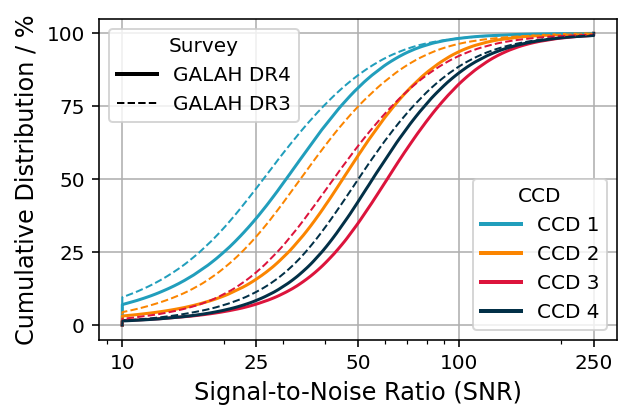

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Setup figure and axis
f, ax = plt.subplots(1,1,figsize=(4.5,3))

# Function to compute and plot CDF
def plot_cdf(ax, data, label, color, dashed=False):
    sorted_data = np.sort(data[np.isfinite(data)])
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    if dashed:
        ax.plot(sorted_data, cdf, c=color, ls='dashed', lw=1)
    else:
        ax.plot(sorted_data, cdf, c=color)

# Define the SNR limits and colors
snr_min = 10
snr_max = 250
colors = ['#219ebc','#fb8500','crimson','#023047']

# Plot the CDFs for each CCD for GALAH DR4 (solid lines)
plot_cdf(ax, galah_dr4_allstar['snr_px_ccd1'].clip(min=snr_min,max=snr_max), label='CCD 1', color=colors[0])
plot_cdf(ax, galah_dr4_allstar['snr_px_ccd2'].clip(min=snr_min,max=snr_max), label='CCD 2', color=colors[1])
plot_cdf(ax, galah_dr4_allstar['snr_px_ccd3'].clip(min=snr_min,max=snr_max), label='CCD 3', color=colors[2])
plot_cdf(ax, galah_dr4_allstar['snr_px_ccd4'].clip(min=snr_min,max=snr_max), label='CCD 4', color=colors[3])

# Plot the CDFs for each CCD for GALAH DR3 (dashed lines)
plot_cdf(ax, galah_dr3_allstar['snr_c1_iraf'].clip(min=snr_min,max=snr_max), label='CCD 1', color=colors[0], dashed=True)
plot_cdf(ax, galah_dr3_allstar['snr_c2_iraf'].clip(min=snr_min,max=snr_max), label='CCD 2', color=colors[1], dashed=True)
plot_cdf(ax, galah_dr3_allstar['snr_c3_iraf'].clip(min=snr_min,max=snr_max), label='CCD 3', color=colors[2], dashed=True)
plot_cdf(ax, galah_dr3_allstar['snr_c4_iraf'].clip(min=snr_min,max=snr_max), label='CCD 4', color=colors[3], dashed=True)

# Set x-axis to log scale and add custom ticks
ax.set_xscale('log')
ax.set_xticks([10, 25, 50, 100, 250])
ax.set_yticks([0,0.25,0.5,0.75,1.0],[0,25,50,75,100])
ax.set_ylabel('Cumulative Distribution / %', fontsize=12)
ax.set_xlabel('Signal-to-Noise Ratio (SNR)', fontsize=12)

ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

# Second legend for the line styles (GALAH DR4 vs DR3)
line_style_legend = [
    plt.Line2D([0], [0], color='k', lw=2, linestyle='-'),
    plt.Line2D([0], [0], color='k', lw=1, linestyle='--')
]
ax.add_artist(ax.legend(line_style_legend, ['GALAH DR4', 'GALAH DR3'], title="Survey", loc='upper left'))

# Create two legends
# First legend for the colors (CCD 1-4)
color_legend = [plt.Line2D([0], [0], color=colors[i], lw=2) for i in range(4)]
ax.legend(color_legend, ['CCD 1', 'CCD 2', 'CCD 3', 'CCD 4'], title="CCD", loc='lower right')

ax.grid(True)

# Show plot with tight layout
plt.tight_layout()
plt.savefig('figures/snr_distribution.pdf',dpi=200,bbox_inches='tight')

plt.show()


## Spectrum analysis

In [184]:
computation_time_allspec_percentile = np.array(np.round(np.percentile(galah_dr4_allspec['comp_time'][np.isfinite(galah_dr4_allspec['comp_time'])], q=[16,50,84]),0),dtype=int)
computation_time_allstar_percentile = np.array(np.round(np.percentile(galah_dr4_allstar['comp_time'][np.isfinite(galah_dr4_allstar['comp_time'])], q=[16,50,84]),0),dtype=int)

print(
    r'$'+str(computation_time_allspec_percentile[1])+
    r'_{-'+str(computation_time_allspec_percentile[1]-computation_time_allspec_percentile[0])+
    r'}^{+'+str(computation_time_allspec_percentile[2]-computation_time_allspec_percentile[1])+'}\,\mathrm{s}$'
)

print(
    r'$'+str(computation_time_allstar_percentile[1])+
    r'_{-'+str(computation_time_allstar_percentile[1]-computation_time_allstar_percentile[0])+
    r'}^{+'+str(computation_time_allstar_percentile[2]-computation_time_allstar_percentile[1])+'}\,\mathrm{s}$'
)


$89_{-29}^{+77}\,\mathrm{s}$
$125_{-33}^{+81}\,\mathrm{s}$


## Comparison to DR3 and APOGEE DR17

In [8]:
# APOGEE DR17
apogee = Table.read('../../Surveys/APOGEE_DR17/allStar-dr17-synspec_rev1.fits',1)
apogee['tmass_id'] = np.array([apogee_id[2:] for apogee_id in apogee['APOGEE_ID']])

# Join DR3 and DR4 via tmass_id
galah_dr3_allstar['tmass_id'] = galah_dr3_allstar['star_id']
dr4_dr3 = join(galah_dr4_allstar, galah_dr3_allstar, keys = 'tmass_id', metadata_conflicts='silent')

# join all 3 via tmass_id
dr4_dr3_apo = join(dr4_dr3, apogee, keys='tmass_id', metadata_conflicts='silent')
dr4_apo = join(galah_dr4_allstar, apogee, keys='tmass_id', metadata_conflicts='silent')

In [9]:
fancy_labels = dict()
fancy_labels['fe_h'] = r'$\mathrm{[Fe/H]}~/~\mathrm{dex}$'

fancy_labels['Li_fe'] = r'$\mathrm{A(Li)}~/~\mathrm{dex}$'
for label in ['C','N','O','Na','Mg','Al','Si','K','Ca','Sc','Ti','V','Cr','Mn','Co','Ni','Cu','Zn','Rb','Sr','Y','Zr','Mo','Ru','Ba','La','Ce','Nd','Sm','Eu',]:
    fancy_labels[label+'_fe'] = r'$\mathrm{['+label+'/Fe]}~/~\mathrm{dex}$'

In [10]:
def plot_parameter_comparison_dr4_dr3_apo(label, nr = 0):
    
    panels = ['a)','b)','c)','d)','e)','f)']
    
    labels_without_dr3 = ['C_fe','N_fe']
    props = dict(boxstyle='round', facecolor='w', alpha=0.85, ec='w')
    
    if label[-3:] == '_fe':
        if label in labels_without_dr3:
            use = (
                (dr4_dr3_apo['flag_'+label.lower()] == 0) &
                (dr4_dr3_apo[label.upper()+'_FLAG'] == 0) &
                np.isfinite(dr4_dr3_apo[label.lower()]) &
                np.isfinite(dr4_dr3_apo[label.upper()]) #&
#                 np.isfinite(dr4_dr3_apo['e_'+label.lower()]) &
#                 np.isfinite(dr4_dr3_apo[label.upper()+'_ERR'])
            )
        else:
            use = (
                (dr4_dr3_apo['flag_'+label] == 0) &
                (dr4_dr3_apo['flag_'+label.lower()] == 0) &
                (dr4_dr3_apo[label.upper()+'_FLAG'] == 0) &
                np.isfinite(dr4_dr3_apo[label.lower()]) &
                np.isfinite(dr4_dr3_apo[label]) &
                np.isfinite(dr4_dr3_apo[label.upper()]) #&
#                 np.isfinite(dr4_dr3_apo['e_'+label]) &
#                 np.isfinite(dr4_dr3_apo['e_'+label.lower()]) &
#                 np.isfinite(dr4_dr3_apo[label.upper()+'_ERR'])
            )
        bins = (np.linspace(-2.5,0.75,100),np.linspace(-0.75,1.25,100))
    
        f, gs = plt.subplots(1,3,figsize=(10,2.5),sharex=True,sharey=True)
    
    ######################################################
    ax = gs[0]
    panel = 'GALAH DR3'
    if nr >= 0:
        panel = panels[3*nr]+' '+panel
    ax.text(0.03,0.88,panel,fontsize=12,transform=ax.transAxes,bbox=props)
    if label not in labels_without_dr3:
        ax.text(0.12,0.75,str(len(dr4_dr3_apo['fe_h_1'][use]))+' stars',fontsize=12,transform=ax.transAxes,bbox=props)

        ax.hist2d(
            dr4_dr3_apo['fe_h_1'][use],
            dr4_dr3_apo[label][use],
            bins=bins, cmin=1, norm=LogNorm()
        )

        difference_percentiles = np.percentile(dr4_dr3_apo[label][use] - dr4_dr3_apo[label.lower()][use],q=[16,50,84])
        median_uncertainty_both = np.median(np.sqrt(dr4_dr3_apo['e_'+label][use]**2+dr4_dr3_apo['e_'+label.lower()][use]**2))
        median_uncertainty_x = np.median(dr4_dr3_apo['e_fe_h_1'][use])
        median_uncertainty_y = np.median(dr4_dr3_apo['e_'+label][use])

        ax.errorbar(
            [0.5],
            [1.0],
            xerr = median_uncertainty_x,
            yerr = median_uncertainty_y,
            capsize=3, color='k'
        )
        
        ax.text(0.5,0.05,
                r'$\mathrm{DR3-DR4} = '+"{:.2f}".format(difference_percentiles[1])+
                '_{-'+"{:.2f}".format(difference_percentiles[1]-difference_percentiles[0])+
                '}^{+'+"{:.2f}".format(difference_percentiles[2]-difference_percentiles[1])+
                '} \pm '+"{:.2f}".format(median_uncertainty_both)+
                '$',fontsize=11,va='bottom',ha='center',
                transform=ax.transAxes,bbox=props)
    ax.set_xlabel(fancy_labels['fe_h'],fontsize=15)
    ax.set_ylabel(fancy_labels[label],fontsize=15)
    
    ######################################################
    ax = gs[1]
    panel = 'GALAH DR4'
    if nr >= 0:
        panel = panels[3*n+1]+' '+panel
    ax.text(0.03,0.88,panel,fontsize=12,transform=ax.transAxes,bbox=props)
    ax.text(0.12,0.75,str(len(dr4_dr3_apo['fe_h_1'][use]))+' stars',fontsize=12,transform=ax.transAxes,bbox=props)
    ax.hist2d(
        dr4_dr3_apo['fe_h_1'][use],
        dr4_dr3_apo[label.lower()][use],
        bins=bins, cmin=1, norm=LogNorm()
    )
    median_uncertainty_x = np.median(dr4_dr3_apo['e_fe_h_1'][use])
    median_uncertainty_y = np.median(dr4_dr3_apo['e_'+label.lower()][use])

    ax.errorbar(
        [0.5],
        [1.0],
        xerr = median_uncertainty_x,
        yerr = median_uncertainty_y,
        capsize=3, color='k'
    )
    
    ax.set_xlabel(fancy_labels['fe_h'],fontsize=15)

    ######################################################
    ax = gs[2]
    panel = 'APOGEE DR17'
    if nr >= 0:
        panel = panels[3*nr]+' '+panel
    ax.text(0.03,0.88,panel,fontsize=12,transform=ax.transAxes,bbox=props)
    ax.text(0.12,0.75,str(len(dr4_dr3_apo['fe_h_1'][use]))+' stars',fontsize=12,transform=ax.transAxes,bbox=props)

    ax.hist2d(
        dr4_dr3_apo['FE_H'][use],
        dr4_dr3_apo[label.upper()][use],
        bins=bins, cmin=1, norm=LogNorm()
    )
    difference_percentiles = np.percentile(dr4_dr3_apo[label.upper()][use] - dr4_dr3_apo[label.lower()][use],q=[16,50,84])
    median_uncertainty_both = np.median(np.sqrt(dr4_dr3_apo[label.upper()+'_ERR'][use]**2+dr4_dr3_apo['e_'+label.lower()][use]**2))
    median_uncertainty_x = np.median(dr4_dr3_apo['FE_H_ERR'][use])
    median_uncertainty_y = np.median(dr4_dr3_apo[label.upper()+'_ERR'][use])

    ax.errorbar(
        [0.5],
        [1.0],
        xerr = median_uncertainty_x,
        yerr = median_uncertainty_y,
        capsize=3, color='k'
    )
    ax.text(0.5,0.05,
        r'$\mathrm{APO-DR4} = '+"{:.2f}".format(difference_percentiles[1])+
        '_{-'+"{:.2f}".format(difference_percentiles[1]-difference_percentiles[0])+
        '}^{+'+"{:.2f}".format(difference_percentiles[2]-difference_percentiles[1])+
        '} \pm '+"{:.2f}".format(median_uncertainty_both)+
        '$',fontsize=11,va='bottom',ha='center',
        transform=ax.transAxes,bbox=props)
    ax.set_xlabel(fancy_labels['fe_h'],fontsize=15)

    plt.tight_layout()
    plt.savefig('figures/comparison_dr4_dr3_apo17_'+label+'.png',bbox_inches='tight',dpi=200)

    plt.show()
    plt.close()

In [11]:
def plot_parameter_comparison_dr4_apo(label, nr = 0):
    
    panels = ['a)','b)','c)','d)','e)','f)']
    
    labels_without_dr3 = ['C_fe','N_fe']
    props = dict(boxstyle='round', facecolor='w', alpha=0.85, ec='w')
    
    if label[-3:] == '_fe':
        if label in labels_without_dr3:
            use = (
                (dr4_dr3_apo['flag_'+label.lower()] == 0) &
                (dr4_dr3_apo[label.upper()+'_FLAG'] == 0) &
                np.isfinite(dr4_dr3_apo[label.lower()]) &
                np.isfinite(dr4_dr3_apo[label.upper()]) #&
#                 np.isfinite(dr4_dr3_apo['e_'+label.lower()]) &
#                 np.isfinite(dr4_dr3_apo[label.upper()+'_ERR'])
            )
        else:
            use = (
                (dr4_dr3_apo['flag_'+label] == 0) &
                (dr4_dr3_apo['flag_'+label.lower()] == 0) &
                (dr4_dr3_apo[label.upper()+'_FLAG'] == 0) &
                np.isfinite(dr4_dr3_apo[label.lower()]) &
                np.isfinite(dr4_dr3_apo[label]) &
                np.isfinite(dr4_dr3_apo[label.upper()]) #&
#                 np.isfinite(dr4_dr3_apo['e_'+label]) &
#                 np.isfinite(dr4_dr3_apo['e_'+label.lower()]) &
#                 np.isfinite(dr4_dr3_apo[label.upper()+'_ERR'])
            )
        bins = (np.linspace(-2.5,0.75,100),np.linspace(-0.75,1.25,100))
    
    f, gs = plt.subplots(1,2,figsize=(7,2.5),sharex=True,sharey=True)
    

    ######################################################
    ax = gs[0]
    ax.text(0.03,0.88,panels[2*nr]+' GALAH DR4',fontsize=12,transform=ax.transAxes,bbox=props)
    ax.text(0.12,0.75,str(len(dr4_dr3_apo['fe_h_1'][use]))+' stars',fontsize=12,transform=ax.transAxes,bbox=props)
    ax.hist2d(
        dr4_dr3_apo['fe_h_1'][use],
        dr4_dr3_apo[label.lower()][use],
        bins=bins, cmin=1, norm=LogNorm()
    )
    median_uncertainty_x = np.median(dr4_dr3_apo['e_fe_h_1'][use])
    median_uncertainty_y = np.median(dr4_dr3_apo['e_'+label.lower()][use])

    ax.errorbar(
        [0.5],
        [1.0],
        xerr = median_uncertainty_x,
        yerr = median_uncertainty_y,
        capsize=3, color='k'
    )
    
    ax.set_xlabel(fancy_labels['fe_h'],fontsize=15)
    ax.set_ylabel(fancy_labels[label],fontsize=15)

    ######################################################
    ax = gs[1]
    ax.text(0.03,0.88,panels[2*nr+1]+' APOGEE DR17',fontsize=12,transform=ax.transAxes,bbox=props)
    ax.text(0.12,0.75,str(len(dr4_dr3_apo['fe_h_1'][use]))+' stars',fontsize=12,transform=ax.transAxes,bbox=props)

    ax.hist2d(
        dr4_dr3_apo['FE_H'][use],
        dr4_dr3_apo[label.upper()][use],
        bins=bins, cmin=1, norm=LogNorm()
    )
    difference_percentiles = np.percentile(dr4_dr3_apo[label.upper()][use] - dr4_dr3_apo[label.lower()][use],q=[16,50,84])
    median_uncertainty_both = np.median(np.sqrt(dr4_dr3_apo[label.upper()+'_ERR'][use]**2+dr4_dr3_apo['e_'+label.lower()][use]**2))
    median_uncertainty_x = np.median(dr4_dr3_apo['FE_H_ERR'][use])
    median_uncertainty_y = np.median(dr4_dr3_apo[label.upper()+'_ERR'][use])

    ax.errorbar(
        [0.5],
        [1.0],
        xerr = median_uncertainty_x,
        yerr = median_uncertainty_y,
        capsize=3, color='k'
    )
    ax.text(0.5,0.05,
        r'$\mathrm{APO-DR4} = '+"{:.2f}".format(difference_percentiles[1])+
        '_{-'+"{:.2f}".format(difference_percentiles[1]-difference_percentiles[0])+
        '}^{+'+"{:.2f}".format(difference_percentiles[2]-difference_percentiles[1])+
        '} \pm '+"{:.2f}".format(median_uncertainty_both)+
        '$',fontsize=11,va='bottom',ha='center',
        transform=ax.transAxes,bbox=props)
    ax.set_xlabel(fancy_labels['fe_h'],fontsize=15)

    plt.tight_layout()
    plt.savefig('figures/comparison_dr4_apo17_'+label+'.png',bbox_inches='tight',dpi=200)

    plt.show()
    plt.close()

/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(
/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


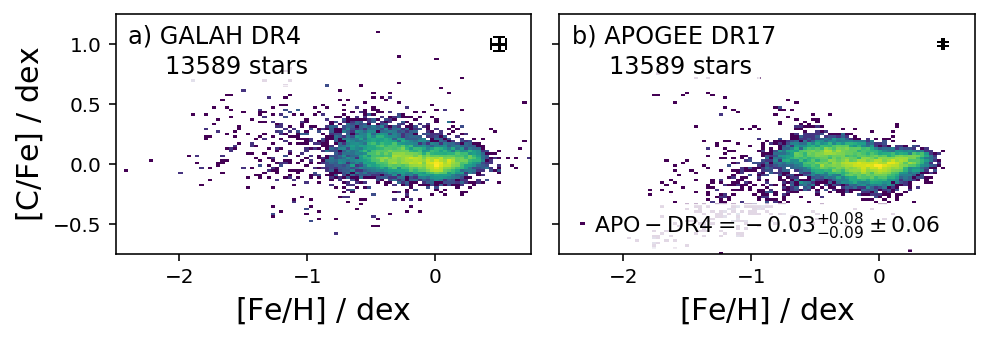

/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(
/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


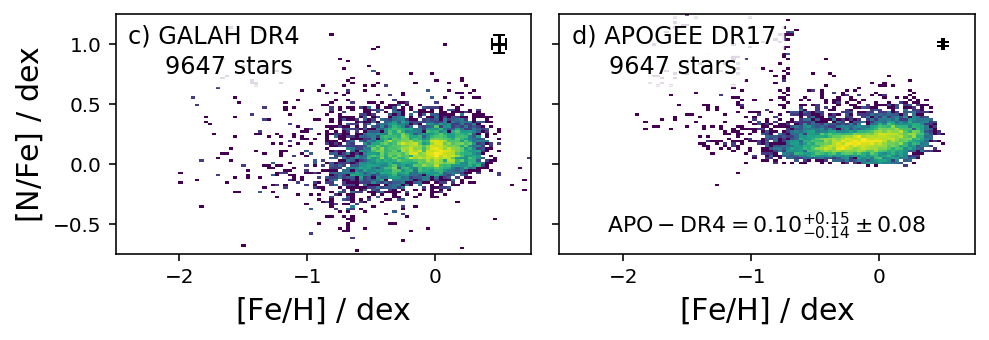

In [12]:
for label in ['Li','C','N','O','Na','Mg','Al','Si','K','Ca','Sc','Ti','V','Cr','Mn','Co','Ni','Cu','Zn','Rb','Sr','Y','Zr','Mo','Ru','Ba','La','Ce','Nd','Sm','Eu',]:    
    try:
        plot_parameter_comparison_dr4_dr3_apo(label=label+'_fe',nr = -1)
    except:
        print('Did not work for '+label)

plot_parameter_comparison_dr4_apo(label='C_fe',nr = 0)
plot_parameter_comparison_dr4_apo(label='N_fe',nr = 1)

plot_parameter_comparison_dr4_dr3_apo(label='Mg_fe',nr = 0)
plot_parameter_comparison_dr4_dr3_apo(label='Ni_fe',nr = 1)

## Table Schema

In [350]:
dr4_allstar_fits = fits.open('../catalogs/galah_dr4_allstar.fits')
dr4_allstar_fits_header = dr4_allstar_fits[1].header
dr4_allstar_fits_header_ttypes = [dr4_allstar_fits_header[x] for x in dr4_allstar_fits_header['TTYPE*']]
dr4_allstar_fits.close()

dr4_allspec_fits = fits.open('../catalogs/galah_dr4_allspec.fits')
dr4_allspec_fits_header = dr4_allspec_fits[1].header
dr4_allspec_fits.close()

# File path to save the LaTeX file
file_path = '../galah_dr4_paper/tables/table_schema_short.tex'

# Create and write the LaTeX content for the MNRAS table
with open(file_path, 'w') as f:
    f.write(r'\begin{table*}[ht]' + '\n')
    f.write(r'\centering' + '\n')
    f.write(r'\caption{Table schema of the GALAH DR4 main catalogues. Columns that are part of \texttt{allspec}, but not \texttt{allstar} are listed below the middle line. For compactness, we have combined repetitive columns (for example with integers N). Detailed table schemas are available in the FITS headers of each catalogue file.}' + '\n')
    f.write(r'\label{tab:main_catalog_schema}' + '\n')
    f.write(r'\begin{tabular}{llll}' + '\n')
    f.write(r'\hline \hline' + '\n')
    f.write(r'Column & Description & Column & Description \\' + '\n')
    f.write(r'\hline' + '\n')
    
    # reset looping values
    running_column_integer = 0
    use = False

    for column in np.arange(1,184+1):
        
        column_name     = dr4_allstar_fits_header['TTYPE'+str(column)]
        try:
            column_unit = dr4_allstar_fits_header['TUNIT'+str(column)]
        except:
            column_unit = ''
        column_format   = dr4_allstar_fits_header['TFORM'+str(column)]
        column_comment  = dr4_allstar_fits_header['TCOMM'+str(column)]
        
        # let's neglect the duplicated element abundance entries
        if (column_name[-3:] != '_fe') | ('li_fe' in column_name) | ('c_fe' in column_name):        
        
            if column_name == 'survey_name': column_comment = '2dF-HERMES Program'
            if column_name == 'field_id': column_comment = 'GALAH Field ID'
            if column_name == 'setup': column_comment = 'allspec/allstar'

            if 'c_fe' in column_name:
                if column_name == 'c_fe':
                    column_name = 'x_fe'
                    column_comment = 'Elemental abundance for [X/Fe]'
                if column_name == 'e_c_fe':
                    column_name = 'e_x_fe'
                    column_comment = 'Uncertainty of elemental abundance [X/Fe]'
                if column_name == 'flag_c_fe':
                    column_name = 'flag_x_fe'
                    column_comment = 'Quality bitmask flag of [X/Fe]'

            use = True
            
            if 'sc_fe' in column_name:
                use = False
            
            if 'sb2_rv_' in column_name:
                if column_name == 'sb2_rv_16':
                    column_name = 'sb2_rv_N'
                    column_comment = 'N'+column_comment[2:]
                else:
                    use = False
                    
            if 'snr_px_ccd' in column_name:
                if column_name == 'snr_px_ccd1':
                    column_name = 'snr_px_ccdN'
                    column_comment = 'Average SNR for CCD N'
                else:
                    use = False
                    
            if '_dib' in column_name:
                
                if column_name == 'ew_dib5780':
                    column_name == 'ew_dibNNNN'
                    column_comment = 'Equivalent width of DIB NNNN'                   
                elif column_name == 'sigma_dib5780':
                    column_name == 'sigma_dibNNNN'
                    column_comment = 'Gaussian sigma of DIB NNNN'                    
                elif column_name == 'rv_dib5780':
                    column_name == 'rv_dibNNNN'
                    column_comment = 'RV of DIB NNNN'
                else:
                    use = False
                
            if use:
                
                if column_name == "flag_sp_fit": column_comment = "Major fitting quality flag"
                if column_name == "px_used_perc": column_comment = "Percentage of spectrum used for fit"
                if column_name == "model_name": column_comment = "Used neural network for synthesis"
                if column_name == "closest_model": column_comment = "Closest neural network for synthesis"
                if column_name == "fit_global_rv": column_comment = "RV fitted or fixed after co-adding?"
                if column_name == "v_bary_eff": column_comment = "Barycentric velocity correction"
                if column_name == "teff": column_comment = "Spectr. effective temperature"
                if column_name == "logg": column_comment = "Photometric surface gravity"
                if column_name == "fe_h": column_comment = "Abundance of Fe as pseudo-metallicity"
                if column_name == "vsini": column_comment = "Broadening velocity"
                if column_name == "bc_ks": column_comment = "Bolometric Correction of Ks band"
                if column_name == "a_ks": column_comment = "Attenuation in Ks-band A(Ks)"
                if column_name == "lbol": column_comment = "Bolometric Luminosity"
                if column_name == "r_med": column_comment = "Median Distance"
                if column_name == "r_lo": column_comment = "Lower Limit Distance"
                if column_name == "r_hi": column_comment = "Higher Limit Distance"
                if column_name == "sb2_rv_N": column_comment = "Nth perc. of RV residual signal"
                if column_name == "res_h_beta": column_comment = "Residual EW in Hbeta core"
                if column_name == "res_h_alpha": column_comment = "Residual EW in Halpha core"
                if column_name == "ew_k_is": column_comment = "EW of K7699 Interstellar Line"
                if column_name == "sigma_k_is": column_comment = "Gaussian sigma of K7699 Interstellar Line"
                if column_name == "rv_k_is": column_comment = "RV of K7699 Interstellar Line"
                if column_name == "parallax_error": column_comment = "Uncertainty of astrometric parallax"
                if column_name == "a_li_upp_lim": column_comment = "Upper limit of absolute 3D NLTE A(Li)"
                if column_name == "e_a_li_teff": column_comment = "Uncertainty of A(Li) due to temperature"

                # try to find maximum column_comment length:
                if len(column_comment) > 45:
                    raise ValueError('if column_name == "'+column_name+'": column_comment = "'+str(column_comment)+'"')

                # first column: define 'line'
                if running_column_integer%2 == 0:
                    line = column_name.replace('_','\_') + ' & '+column_comment.replace('_','\_')
                # second column: add to 'line' and save to f
                else:
                    line = line + ' & '+ column_name.replace('_','\_') + ' & ' + column_comment.replace('_','\_') + r' \\ ' + '\n'
                    f.write(line)

                running_column_integer +=1

    # Moving on to allspec
    f.write(r'\hline' + '\n')

    # reset looping values
    running_column_integer = 0

    for column in np.arange(1,180+1):
        
        use = False
        
        column_name     = dr4_allspec_fits_header['TTYPE'+str(column)]
        try:
            column_unit = dr4_allspec_fits_header['TUNIT'+str(column)]
        except:
            column_unit = ''
        column_format   = dr4_allspec_fits_header['TFORM'+str(column)]
        column_comment  = dr4_allspec_fits_header['TCOMM'+str(column)]
        
        if column_name not in dr4_allstar_fits_header_ttypes:
            if column_name in [
                'rv_comp_nr','rv_comp_1_p','rv_comp_2_h','rv_comp_2_p',
                'logg_spec','e_logg_spec'
            ]:
                use = True

                if column_name == "rv_comp_nr": column_comment = "Nr RV cross-correlation function peaks"
                if column_name == "logg_spec": column_comment = "Spectroscopic surface gravity estimate"
                    
                # try to find maximum column_comment length:
                if len(column_comment) > 45:
                    raise ValueError('if column_name == "'+column_name+'": column_comment = "'+str(column_comment)+'"')
                
        if use:
            
            # first column: define 'line'
            if running_column_integer%2 == 0:
                line = column_name.replace('_','\_') + ' & '+column_comment.replace('_','\_')
            # second column: add to 'line' and save to f
            else:
                line = line + ' & '+ column_name.replace('_','\_') + ' & ' + column_comment.replace('_','\_') + r' \\ ' + '\n'
                f.write(line)

            running_column_integer +=1
        
    # End the table
    f.write(r'\hline' + '\n')
    f.write(r'\end{tabular}' + '\n')
    f.write(r'\end{table*}')

## Flag_SP

In [567]:
import pickle

a_file = open("../spectrum_post_processing/final_flag_sp_dictionary.pkl", "rb")
flag_sp_dictionary = pickle.load(a_file)
a_file.close()

if (flag_sp_dictionary['is_sb1'][0] != 4) | (flag_sp_dictionary['no_results'][0] != 16384):
    raise ValueError('Using inconsistent Flag Sp Dictionary!')
    
flag_list = []
for flag in np.arange(0,16):
    if flag == 0:
        flag_raised = galah_dr4_allstar['flag_sp'] == 0
#         flag_list.append(['0 & No flag & '+str(len(data['flag_sp'][flag_raised]))+' \\'])
        flag_list.append([0,'No flag',len(galah_dr4_allstar['flag_sp'][flag_raised])])
        print('',0,'&','no flag','&',len(galah_dr4_allstar['flag_sp'][flag_raised]))
    else:
        flag_raised = (galah_dr4_allstar['flag_sp'] & 2**(flag-1) > 0)
        flag_list.append([str(2**(flag-1)),list(flag_sp_dictionary.keys())[flag-1],len(galah_dr4_allstar['flag_sp'][flag_raised])])
        print(flag,2**(flag-1),'&', list(flag_sp_dictionary.keys())[flag-1],'&',len(galah_dr4_allstar['flag_sp'][flag_raised]))
flag_list = np.array(flag_list)

 0 & no flag & 663075
1 1 & emission & 7646
2 2 & ccd_missing & 44344
3 4 & is_sb1 & 25538
4 8 & is_sb2 & 32566
5 16 & chi2_3sigma & 20544
6 32 & vsini_warn & 95990
7 64 & vmic_warn & 78686
8 128 & sb_triple_warn & 0
9 256 & teff_warn & 0
10 512 & logg_warn & 10900
11 1024 & fe_h_warn & 0
12 2048 & snr_warn & 71154
13 4096 & not_converged & 0
14 8192 & no_model & 5953
15 16384 & no_results & 10899


In [571]:
parsec = Table.read('../auxiliary_information/parsec_isochrones/parsec_isochrones_logt_8p00_0p01_10p17_mh_m2p75_0p25_m0p75_mh_m0p60_0p10_0p70_GaiaEDR3_2MASS.fits')

12


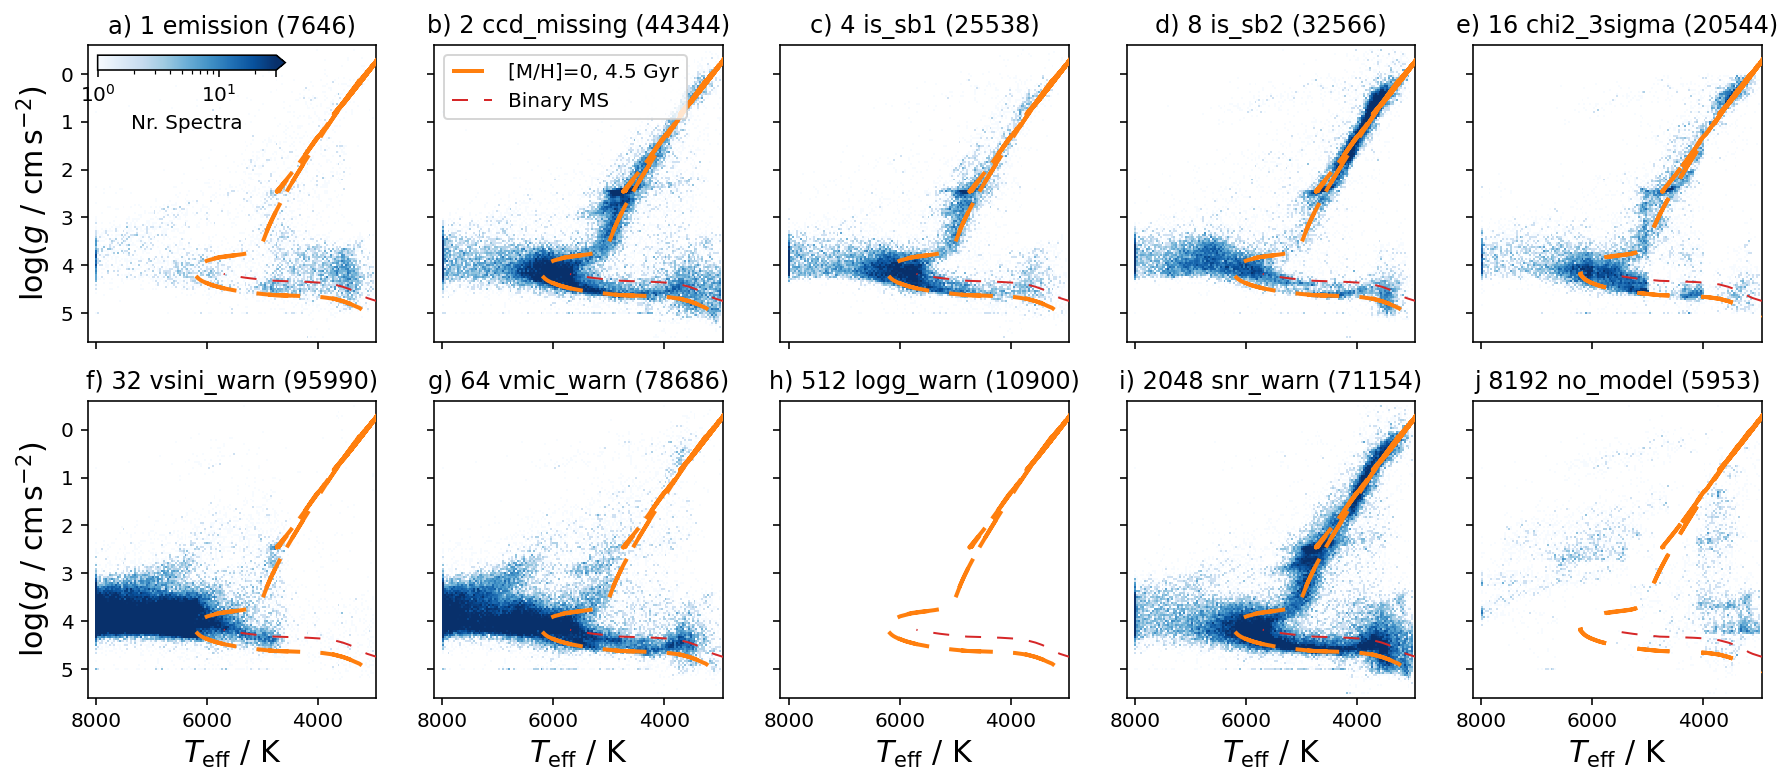

In [577]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

setup = 'allstar'
data = galah_dr4_allstar

raised_flags = np.where(flag_list[:,2]!='0')[0]
flags = np.arange(0,16)
raised_flags = flags[raised_flags]

panel = ['a)','b)','c)','d)','e)','f)','g)','h)','i)','j']

print(len(raised_flags))

f, gs = plt.subplots(2,5,figsize=(15,6),sharex=True,sharey=True)

parsec_iso1 = (abs(10**(parsec['logAge']-9) - 4.5) < 0.1) & (parsec['m_h'] == 0)

if setup == 'allspec':
    vmax = 100
else:
    vmax = 30

for index,flag in enumerate(raised_flags[1:-1]):
    row = int(np.floor(index/5))
    ax = gs[row,index - row*5]
    
    y_label = 'logg'

    if flag == 0:
        
        flag_raised = data['flag_sp'] == 0
        ax.set_title(panel[index]+' '+str(flag)+' '+list(flag_sp_dictionary.keys())[flag-1]+' ('+str(len(data['flag_sp'][flag_raised]))+')')
                
    else:
        
        flag_raised = (data['flag_sp'] & 2**(flag-1) > 0)
        
        if (2**(flag-1) == flag_sp_dictionary['logg_warn'][0]):
            y_label = 'logg_spec'
        if (2**(flag-1) == flag_sp_dictionary['no_model'][0]):
            y_label = 'logg_spec'
        if setup == 'allstar':
            y_label = 'logg'

        ax.set_title(panel[index]+' '+str(2**(flag-1))+' '+list(flag_sp_dictionary.keys())[flag-1]+' ('+str(len(data['flag_sp'][flag_raised]))+')')
        
    h = ax.hist2d(
        data['teff'][flag_raised],
        data[y_label][flag_raised],
        bins = (np.linspace(2950,8150,150),np.linspace(-0.6,5.6,150)),
        cmin = 1, norm=LogNorm(vmin = 1,vmax = vmax), cmap='Blues',
        zorder = 1
    )

    ax.plot(
        10**parsec['logT'][parsec_iso1],
        parsec['logg'][parsec_iso1],
        zorder = 3,c = 'C1',ls = (0, (8, 8)),lw=2,
        label = '[M/H]=0, 4.5 Gyr'
    )
    ax.plot(
        10**parsec['logT'][parsec_iso1][:30],
        parsec['logg'][parsec_iso1][:30]-0.3,
        zorder = 3,c = 'C3',ls = (0, (8, 8)),lw=1,
        label = 'Binary MS'
    )

    if index == 0:

        axins1 = inset_axes(
            ax,
            width="65%",  # width: 50% of parent_bbox width
            height="5%",  # height: 5%
            loc="upper left",
        )
        cbar = plt.colorbar(h[-1],cax=axins1,orientation="horizontal",ticks = [1,10,vmax],extend='max')
        cbar.set_label('Nr. Spectra')
        
    if index == 1:
        ax.legend(loc='upper left')
        
    if row > 0:
        ax.set_xlabel(r'$T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)

gs[0,0].set_ylabel(r'$\log (g~/~\mathrm{cm\,s^{-2}})$',fontsize=15)
gs[1,0].set_ylabel(r'$\log (g~/~\mathrm{cm\,s^{-2}})$',fontsize=15)

ax.set_xlim(8150,2950)
ax.set_ylim(5.6,-0.6)
# plt.tight_layout(w_pad=0,h_pad=0)
plt.savefig('figures/flag_sp_overview_'+setup+'.png',dpi=200,bbox_inches='tight')

In [ ]:
dr4_allstar_total = len(dr4_allstar)
dr4_allspec_total = len(dr4_allspec)

dr4_allstar_total, dr4_allspec_total

In [ ]:
import pickle
a_file = open("../spectrum_post_processing/final_flag_sp_dictionary.pkl", "rb")
flag_sp_dictionary = pickle.load(a_file)
a_file.close()
flag_sp_dictionary

In [569]:
# File path to save the LaTeX file
file_path = '../galah_dr4_paper/tables/flag_sp_statistics.tex'

# Create and write the LaTeX content for the MNRAS table
with open(file_path, 'w') as f:
    f.write(r'\begin{table}[ht]' + '\n')
    f.write(r'\centering' + '\n')
    f.write(r'\caption{List of major quality flag \texttt{flag\_sp} listing the bit, description and how often the flag was raised for the \textit{allstar} and \textit{allspec} routines. Notes: Multiple bits can be raised for each of the 1\,085\,520 spectra spectra of the  of 917\,588 stars.}' + '\n')
    f.write(r'\label{tab:flag_sp}' + '\n')
    f.write(r'\begin{tabular}{ccccc}' + '\n')
    f.write(r'\hline \hline' + '\n')
    f.write(r'Raised Bit & Flag & Description & \textit{allspec} & \textit{allstar} \\' + '\n')
    f.write(r'\hline' + '\n')
    
    f.write(r'  & 0 & No flag & '+str(len(np.where(galah_dr4_allspec['flag_sp']==0)[0]))+r' & '+str(len(np.where(galah_dr4_allstar['flag_sp']==0)[0]))+r' \\'+' \n')
    
    for flag in np.arange(15):
        if flag == 0:  text = 'Emission'
        if flag == 1:  text = 'CCD missing'
        if flag == 2:  text = 'Spectr. Binary 1'
        if flag == 3:  text = 'Spectr. Binary 2'
        if flag == 4:  text = r'$\chi^2 > 3\sigma$'
        if flag == 5:  text = r'\vsini warning'
        if flag == 6:  text = r'\vmic warning'
        if flag == 7:  text = 'Triple Binary warning'
        if flag == 8:  text = r'\Teff warning'
        if flag == 9:  text = r'\logg warning'
        if flag == 10: text = r'\feh warning'
        if flag == 11: text = 'S/N low'
        if flag == 12: text = 'Not converged'
        if flag == 13: text = 'Model extrapolated'
        if flag == 14: text = 'No Results'
            
#         check = np.where((dr4_allspec['flag_sp'] & 2**flag) != 0)[0]
#         print(flag, 2**flag, dr4_allspec['flag_sp'][check])

        raised_in_allspec = str(len(np.where((galah_dr4_allspec['flag_sp'] & 2**flag) != 0)[0]))
        raised_in_allstar = str(len(np.where((galah_dr4_allstar['flag_sp'] & 2**flag) != 0)[0]))

        f.write(str(flag)+r' & '+str(2**flag)+' & '+text+' & '+ raised_in_allspec + ' & '+ raised_in_allstar +r' \\' + '\n')
                
    # End the table
    f.write(r'\hline' + '\n')
    f.write(r'\end{tabular}' + '\n')
    f.write(r'\end{table}')

## Zero Point shifts

In [352]:
zeropoints = Table.read('../catalogs/galah_dr4_zeropoints_240705.fits')

rows = len(zeropoints)
    
# File path to save the LaTeX file
file_path = 'tables/zeropoints_allstar.tex'

# Create and write the LaTeX content for the MNRAS table
with open(file_path, 'w') as f:
    f.write(r'\begin{table}[ht]' + '\n')
    f.write(r'\centering' + '\n')
    f.write(r'\caption{Zero point corrections applied to the \texttt{allstar} measurements. We used \citet{Prsa2016} as reference for Solar parameters and \citet{Grevesse2007}, consistent with the \marcs model atmosphere composition \citep{Gustafsson2008}, as reference for Solar abundances. For reference, we also show the combined rotational and macroturbulence as well as microturbulence velocities from \citet{Jofre2014}.}' + '\n')
    f.write(r'\label{tab:zeropoints}' + '\n')
    f.write(r'\begin{tabular}{cccccc}' + '\n')
    f.write(r'\hline \hline' + '\n')
    f.write(r'Proporty & Reference & Zeropoint & Shift & Vesta & Vesta Shift \\' + '\n')
    f.write(r'\hline' + '\n')
    
    for row in range(rows):
        label = str(zeropoints['label'][row])
        if label == 'teff':
            label = r'\Teff'
        if label == 'logg':
            label = r'\logg'
        if label == 'fe_h':
            label = r'\feh'
        if label == 'vmic':
            label = r'\vmic'
        if label == 'vsini':
            label = r'\vsini'
        if label[:2] == 'a_':
            if len(label) > 3:
                label = r'A('+label[2].upper()+label[3]+')'
            else:
                label = r'A('+label[2].upper()+')'
        f.write(label+r' & '+str(zeropoints['solar_G07'][row])+' & '+str(zeropoints['zeropt_allstar'][row])+' & '+str(zeropoints['shift_allstar'][row])+' & '+str(zeropoints['vesta_allstar'][row])+' & '+str(zeropoints['d_vesta_allstar'][row])+r' \\' + '\n')
                
    # End the table
    f.write(r'\hline' + '\n')
    f.write(r'\end{tabular}' + '\n')
    f.write(r'\end{table}')


## Overview of what's in GALAH DR4

### Stellar parameters and abundances

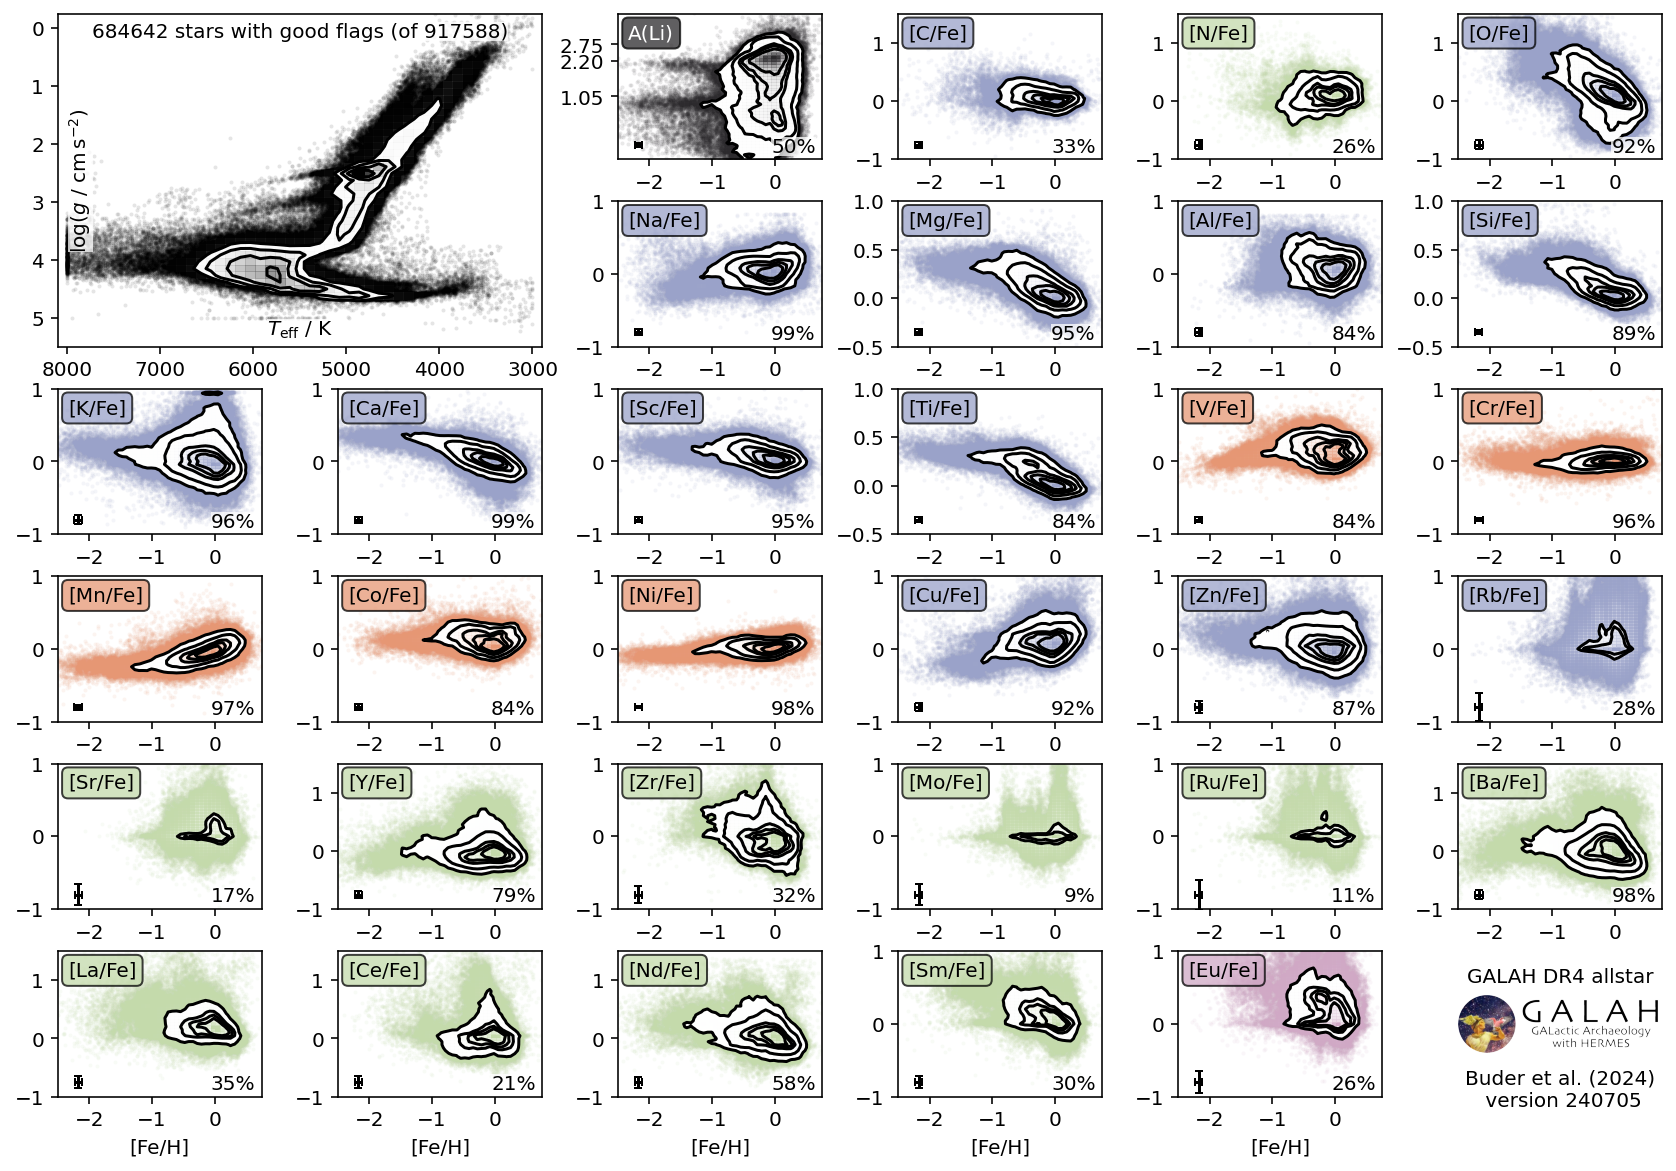

In [377]:
def plot_galah_dr4_overview_A4(data,name):
    elements = [
        'Li',
        'C',
        'N',
        'O',
        'Na',
        'Mg',
        'Al',
        'Si',
        'K',
        'Ca',
        'Sc',
        'Ti',
        'V',
        'Cr',
        'Mn',
        'Co',
        'Ni',
        'Cu',
        'Zn',
        'Rb',
        'Sr',
        'Y',
        'Zr',
        'Mo',
        'Ru',
        'Ba',
        'La',
        'Ce',
        'Nd',
        'Sm',
        'Eu'
        ]

    fig, axs = plt.subplots(ncols=6, nrows=6, figsize=(11.75,8.25))
    gs = axs[0, 0].get_gridspec()
    for ax in axs[0, :2]:
        ax.remove()
    for ax in axs[1, :2]:
        ax.remove()

    # HRD 

    good_bad_flag_cut = 4
    
    flag_sp_0 = data['flag_sp'] < good_bad_flag_cut
    flag_sp_above0_but_results = (data['flag_sp'] >= good_bad_flag_cut) & (data['flag_sp'] < np.max(data['flag_sp']))
    flag_sp_results = data['flag_sp'] < np.max(data['flag_sp'])
    finite_teff_logg = np.isfinite(data['teff']) & np.isfinite(data['logg'])
    
    teff_limits = [2900,8100]
    logg_limits = [-0.25,5.5]

    axbig = fig.add_subplot(gs[:2, :2])
    corner.hist2d(
        data['teff'][flag_sp_0],
        data['logg'][flag_sp_0],
        bins=(np.linspace(teff_limits[0],teff_limits[1],50),np.linspace(logg_limits[0],logg_limits[1],50)),
        range = (teff_limits,logg_limits),
        ax = axbig
    )
    axbig.set_xlim(teff_limits[1],teff_limits[0])
    axbig.set_ylim(logg_limits[1],logg_limits[0])
    if name == 'allspec':
        axbig.text(0.5,0.93,str(len(data['teff'][flag_sp_0]))+r' spectra with good flags (of '+str(len(data['teff']))+')',transform=axbig.transAxes,ha='center',bbox=dict(boxstyle='square,pad=0',lw=0, facecolor='w', alpha=0.75))
    if name == 'allstar':
        axbig.text(0.5,0.93,str(len(data['teff'][flag_sp_0]))+r' stars with good flags (of '+str(len(data['teff']))+')',transform=axbig.transAxes,ha='center',bbox=dict(boxstyle='square,pad=0',lw=0, facecolor='w', alpha=0.75))
    axbig.text(0.5,0.035,r'$T_\mathrm{eff}~/~\mathrm{K}$',transform=axbig.transAxes,ha='center',bbox=dict(boxstyle='square,pad=0',lw=0, facecolor='w', alpha=0.75))
    axbig.text(0.02,0.5,r'$\log (g~/~\mathrm{cm\,s^{-2}})$',transform=axbig.transAxes,va='center',rotation=90,bbox=dict(boxstyle='square,pad=0',lw=0, facecolor='w', alpha=0.75))

    # read an image
    img = iio.imread("figures/logo_desktop.png")

    ax = axs[-1,-1]
    ax.imshow(img)
    ax.axis('off')
    ax.text(0.5,+1.2,'GALAH DR4 allstar',transform=ax.transAxes,ha='center')
    ax.text(0.5,-0.9,'Buder et al. (2024)\n version 240705',transform=ax.transAxes,ha='center')

    for ind, label in enumerate(elements):    
        if ind <= 3:
            ax = axs[0,2+ind]
        elif ind <= 7:
            ax = axs[1,2+ind-4]
        elif ind <= 13:
            ax = axs[2,ind-8]
        elif ind <= 19:
            ax = axs[3,ind-14]
        elif ind <= 25:
            ax = axs[4,ind-20]
        elif ind <= 32:
            ax = axs[5,ind-26]
        else:
            raise ValueError('blob')
        if label == 'Li':
            color = '#2B292C'
        elif label in ['C','O','Na','Mg','Al','Si','K','Ca','Sc','Ti','Cu','Zn','Rb']:
            color = '#9AA2C9'
        elif label in ['V','Cr','Mn','Fe','Co','Ni']:
            color = '#E69774'
        elif label in ['N','Sr','Y','Zr','Mo','Ru','Ba','La','Ce','Nd','Sm']:
            color = '#C4DAAB'
        elif label in ['Eu']:
            color = '#D0A8C5'

        xbins = np.linspace(-2.5,0.75,50)
        if label == 'Li':
            ybins = np.linspace(-1.0,3.75,50)
        elif label in ['C','N','O','Y','Ba','La','Ce','Nd']:
            ybins = np.linspace(-1,1.5,50)
        elif label in ['Mg','Si','Ti']:
            ybins = np.linspace(-0.5,1,50)
        else:
            ybins = np.linspace(-1,1,50)

        # First panel: Detections for GALAH DR4 [Fe/H] vs. [X/Fe]
        if label == 'Li':
            textcolor = 'w'
            ax.set_yticks([1.05,2.2,2.75])
        else:
            textcolor = 'k'

        if label == 'Li':
            flag0 = flag_sp_0 & (data['flag_a_li'] == 0)
        else:
            flag0 = flag_sp_0 & (data['flag_'+label.lower()+'_fe'] == 0) #& (data['fe_h'] > -1)

        if label == 'Li':
            ax.text(0.05,0.83,'A('+label+')',ha='left',color=textcolor, transform=ax.transAxes,fontsize=10,bbox=dict(boxstyle='round', facecolor=color, alpha=0.75))
        else:
            ax.text(0.05,0.83,'['+label+'/Fe]',ha='left',color=textcolor, transform=ax.transAxes,fontsize=10,bbox=dict(boxstyle='round', facecolor=color, alpha=0.75))
        ax.text(0.97,0.05,"{:.0f}".format(100*len(data['e_fe_h'][flag0])/len(data['teff'][flag_sp_0]))+'%',ha='right', transform=ax.transAxes,fontsize=10,bbox=dict(boxstyle='square,pad=0',lw=0,facecolor='w', alpha=0.75))

        levels = (0.97,0.9,0.68,0.5,0.3)
        if label in ['La','Ce','Sm','Eu']:
            levels = (0.9,0.68,0.5,0.3)
        elif label in ['Rb','Sr','Mo','Ru']:
            levels = (0.5,0.3)
            
        if label == 'Li':
            ydata = data['a_li'][flag0]
            yerr = np.ma.median(0.5*(data['e_a_li_low'][flag0] + data['e_a_li_upp'][flag0]))
        else:
            ydata = data[label.lower()+'_fe'][flag0]
            yerr = np.ma.median(data['e_'+label.lower()+'_fe'][flag0])
            
        #if (len(data['fe_h'][flag0]) > 20) & (label != 'Rb'):
        corner.hist2d(
            data['fe_h'][flag0],
            ydata,
            bins = (xbins,ybins),
            levels = levels,
            contour_kwargs=dict(colors=['k']),
            color=color,
            range=[(xbins[0],xbins[-1]),(ybins[0],ybins[-1])],
            ax = ax
        )
        ax.set_xlim(xbins[0],xbins[-1])
        ax.set_ylim(ybins[0],ybins[-1])
        ax.errorbar(
            0.9*xbins[0]+0.1*xbins[-1],
            0.9*ybins[0]+0.1*ybins[-1],
            xerr=np.ma.median(data['e_fe_h'][flag0]),
            yerr=yerr,
            capsize=2,color='k'
        )
        if ind >= 26:
            ax.set_xlabel('[Fe/H]')
    #     else:
        ax.set_xticks([-2,-1,0])
    plt.tight_layout(h_pad=0,w_pad=0)
    plt.savefig('figures/galah_dr4_overview_'+name+'.png',dpi=150,bbox_inches='tight')
    plt.show()
    plt.close()

plot_galah_dr4_overview_A4(data=galah_dr4_allstar,name='allstar')

### [C/N]

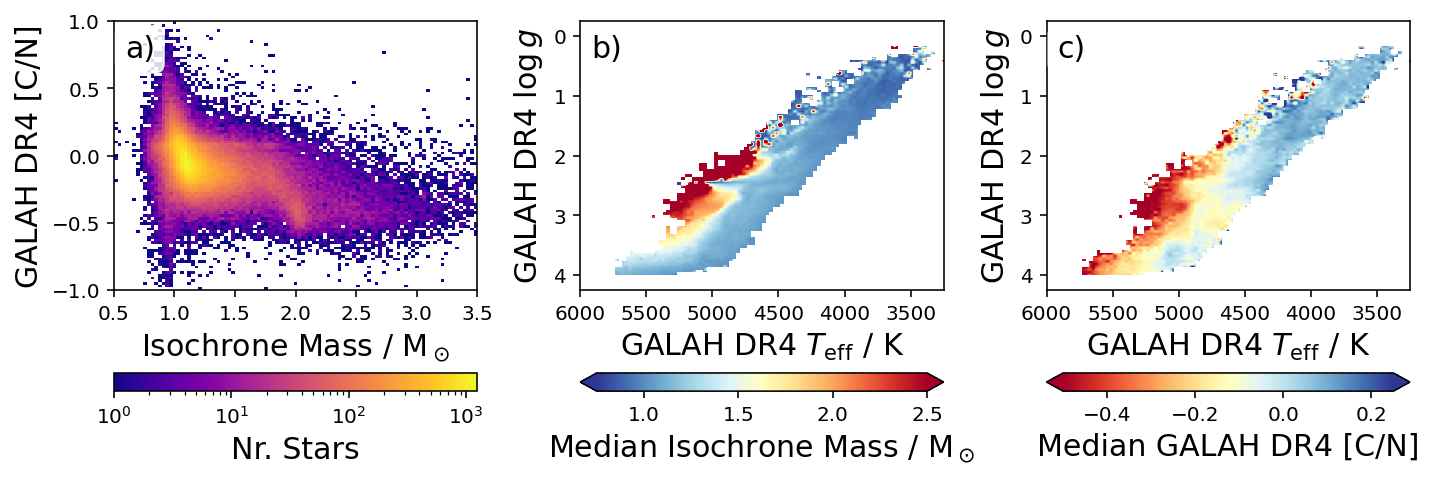

In [560]:
from scipy.stats import binned_statistic_2d

props = dict(boxstyle='round', facecolor='w', alpha=0.85, ec='w')

f, gs = plt.subplots(1,3,figsize=(10,3.5))

useful = (
    (galah_dr4_allstar['flag_sp'] == 0) &
    (galah_dr4_allstar['flag_c_fe'] == 0) &
    (galah_dr4_allstar['flag_n_fe'] == 0) &
    np.isfinite(galah_dr4_allstar['mass'])
)

ax = gs[0]
ax.text(0.03,0.95,'a)',fontsize=15,transform=ax.transAxes,bbox=props, va='top', ha='left')
ax.set_xlabel('Isochrone Mass / $\mathrm{M_\odot}$',fontsize=15)
ax.set_ylabel('GALAH DR4 [C/N]',fontsize=15)
h = ax.hist2d(
    galah_dr4_allstar['mass'][useful],
    galah_dr4_allstar['c_fe'][useful] - galah_dr4_allstar['n_fe'][useful],
    bins = (np.linspace(0.5,3.5,100),np.linspace(-1,1,100)),
    norm = LogNorm(),
    cmap = 'plasma'
);
cbar = plt.colorbar(h[-1],ax=ax, orientation = 'horizontal',pad=0.2)
cbar.set_label('Nr. Stars',fontsize=15)

# Second panel: 2D histogram (binned stats) colored by median
bin_stat_mean, xedges, yedges, binnumber = binned_statistic_2d(
    galah_dr4_allstar['teff'][useful],
    galah_dr4_allstar['logg'][useful],
    galah_dr4_allstar['mass'][useful],
    statistic='median', bins=(np.linspace(3250,6000,100),np.linspace(-0.25,4.25,100))
)

ax = gs[1]
ax.text(0.03,0.95,'b)',fontsize=15,transform=ax.transAxes,bbox=props, va='top', ha='left')
ax.set_xlabel('GALAH DR4 $T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
ax.set_ylabel('GALAH DR4 $\log g$',fontsize=15)

im = ax.imshow(bin_stat_mean.T, origin='lower', aspect='auto',
                   extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                   cmap='RdYlBu_r',vmin = 0.75, vmax = 2.5)
cbar = plt.colorbar(im, ax=ax, orientation = 'horizontal',pad=0.2, extend='both')
cbar.set_label('Median Isochrone Mass / $\mathrm{M_\odot}$',fontsize=15)
ax.invert_xaxis()
ax.invert_yaxis()


# Second panel: 2D histogram (binned stats) colored by median
bin_stat_mean, xedges, yedges, binnumber = binned_statistic_2d(
    galah_dr4_allstar['teff'][useful],
    galah_dr4_allstar['logg'][useful],
    galah_dr4_allstar['c_fe'][useful] - galah_dr4_allstar['n_fe'][useful],
    statistic='median', bins=(np.linspace(3250,6000,100),np.linspace(-0.25,4.25,100))
)

ax = gs[2]
ax.text(0.03,0.95,'c)',fontsize=15,transform=ax.transAxes,bbox=props, va='top', ha='left')
ax.set_xlabel('GALAH DR4 $T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
ax.set_ylabel('GALAH DR4 $\log g$',fontsize=15)

im = ax.imshow(bin_stat_mean.T, origin='lower', aspect='auto',
                   extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                   cmap='RdYlBu', vmin = -0.5, vmax = 0.25)
cbar = plt.colorbar(im, ax=ax, orientation = 'horizontal',pad=0.2, extend='both')
cbar.set_label('Median GALAH DR4 [C/N]',fontsize=15)
ax.invert_xaxis()
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('../galah_dr4_paper/figures/cn_mass.png',dpi=200,bbox_inches='tight')

In [ ]:
from scipy.stats import binned_statistic_2d

f, gs = plt.subplots(1,3,figsize=(10,3.5))

useful = (
    (dr4_allstar['flag_sp'] == 0) &
    (dr4_allstar['flag_c_fe'] == 0) &
    (dr4_allstar['flag_n_fe'] == 0) &
    np.isfinite(dr4_allstar['age'])
)

ax = gs[0]
ax.set_xlabel('Isochrone Mass / $\mathrm{M_\odot}$',fontsize=15)
ax.set_ylabel('GALAH DR4 [C/N]',fontsize=15)
h = ax.hist2d(
    np.log10(dr4_allstar['age'][useful]*10**9),
    dr4_allstar['c_fe'][useful] - dr4_allstar['n_fe'][useful],
    bins = (np.linspace(8.2,10.2,100),np.linspace(-1,1,100)),
    norm = LogNorm(),
    cmap = 'plasma'
);
cbar = plt.colorbar(h[-1],ax=ax, orientation = 'horizontal',pad=0.2)
cbar.set_label('Nr. Stars',fontsize=15)

# # Second panel: 2D histogram (binned stats) colored by median
# bin_stat_mean, xedges, yedges, binnumber = binned_statistic_2d(
#     dr4_allstar['teff'][useful],
#     dr4_allstar['logg'][useful],
#     dr4_allstar['age'][useful],
#     statistic='median', bins=(np.linspace(3250,6000,100),np.linspace(-0.25,4.25,100))
# )

# ax = gs[1]
# ax.set_xlabel('GALAH DR4 $T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
# ax.set_ylabel('GALAH DR4 $\log g$',fontsize=15)

# im = ax.imshow(bin_stat_mean.T, origin='lower', aspect='auto',
#                    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
#                    cmap='RdYlBu',vmin = 0.75, vmax = 2.5)
# cbar = plt.colorbar(im, ax=ax, orientation = 'horizontal',pad=0.2, extend='both')
# cbar.set_label('Median Isochrone Mass / $\mathrm{M_\odot}$',fontsize=15)
# ax.invert_xaxis()
# ax.invert_yaxis()


# # Second panel: 2D histogram (binned stats) colored by median
# bin_stat_mean, xedges, yedges, binnumber = binned_statistic_2d(
#     dr4_allstar['teff'][useful],
#     dr4_allstar['logg'][useful],
#     dr4_allstar['c_fe'][useful] - dr4_allstar['n_fe'][useful],
#     statistic='median', bins=(np.linspace(3250,6000,100),np.linspace(-0.25,4.25,100))
# )

# ax = gs[2]
# ax.set_xlabel('GALAH DR4 $T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
# ax.set_ylabel('GALAH DR4 $\log g$',fontsize=15)

# im = ax.imshow(bin_stat_mean.T, origin='lower', aspect='auto',
#                    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
#                    cmap='RdYlBu', vmin = -0.5, vmax = 0.25)
# cbar = plt.colorbar(im, ax=ax, orientation = 'horizontal',pad=0.2, extend='both')
# cbar.set_label('Median GALAH DR4 [C/N]',fontsize=15)
# ax.invert_xaxis()
# ax.invert_yaxis()

# plt.tight_layout()
# plt.savefig('../galah_dr4_paper/figures/cn_mass.png',dpi=200,bbox_inches='tight')

### Globular Clusters

In [462]:
globular_clusters =Table.read('../auxiliary_information/VasilievBaumgardt_2021_MNRAS_505_5978_cluster_source_id_memberprob0p7.fits')
globular_clusters['gaiadr3_source_id'] = globular_clusters['source_id']
dr4_gc = join(galah_dr4_allstar, globular_clusters, keys = 'gaiadr3_source_id')

/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(

/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(

/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(

/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(

/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(

/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.p

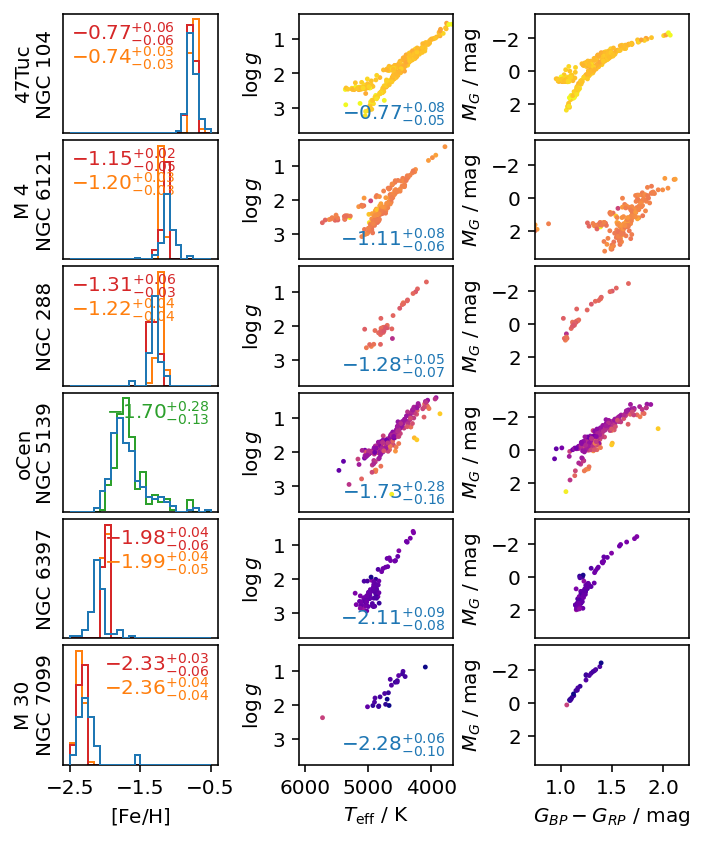

In [561]:
top10_cluster_by_feh = [
    'NGC_104_47Tuc',
#     'NGC_6362',
    'NGC_6121_M_4',
#     'NGC_362',
    'NGC_288',
#     'NGC_1851',
#     'NGC_7089_M_2',
    'NGC_5139_oCen',
    'NGC_6397',
    'NGC_7099_M_30',
]

NGC_5139_oCen_JP10 = Table.read('../validation/literature_data/JohnsonPilachowski2010_ApJ_722_1373_OmegaCen_xmatch.fits')
Caretta09_Giraffe = Table.read('../validation/literature_data/Carretta2009_AandA_505_117_Giraffe.fits')
Caretta09_Uves = Table.read('../validation/literature_data/Carretta2009_AandA_505_139_UVES.fits')

f, gs = plt.subplots(len(top10_cluster_by_feh),3,figsize=(5,len(top10_cluster_by_feh)))

for gc_index, gc in enumerate(top10_cluster_by_feh):

    in_gc = (dr4_gc['cluster']==gc) & ((dr4_gc['flag_sp']==0) | (dr4_gc['flag_sp']==2048))
    
    ax = gs[gc_index,0]

    ngc = gc.split('_')
    if len(ngc) == 2:
        ax.set_ylabel(gc.replace('_',' '))
    else:
        ax.set_ylabel(" ".join(ngc[2:])+'\n'+" ".join(ngc[:2]))

    if gc_index != len(top10_cluster_by_feh)-1:
        ax.set_xticks([])
    else:
        ax.set_xlabel(r'$\mathrm{[Fe/H]}$')
        ax.set_xticks([-2.5,-1.5,-0.5])
    ax.set_yticks([])
    
    ax.hist(
        dr4_gc['fe_h'][in_gc],
        bins = np.linspace(-2.5,-0.5,25),
        histtype='step',density=1,
        label = 'GALAH DR4',color='C0',
        zorder=5
    )
    
    ngc = int(gc.split('_')[1]) 

    xpos = 0.95; ha = 'right'
    if ngc in [104,6121,288]:
        xpos = 0.05; ha = 'left'
    
    if ngc in Caretta09_Giraffe['NGC']:
        star_in_ngc = np.where(Caretta09_Giraffe['NGC']==ngc)[0]
        ax.hist(
            Caretta09_Giraffe['__FeI_H_'][star_in_ngc],
            bins = np.linspace(-2.5,-0.5,25),
            histtype='step',density=1,
            label = 'C+ (2009) Giraffe',color='C1'
        )
        perc = np.percentile(Caretta09_Giraffe['__FeI_H_'][star_in_ngc],q=[16,50,84])
        ax.text(xpos,0.75,r'$'+"{:.2f}".format(perc[1])+'_{-'+"{:.2f}".format(perc[1]-perc[0])+'}^{+'+"{:.2f}".format(perc[2]-perc[1])+'}$',transform=ax.transAxes,ha=ha,va='top',color='C1')
    
    if ngc in Caretta09_Uves['NGC']:
        star_in_ngc = np.where(Caretta09_Uves['NGC']==ngc)[0]
        ax.hist(
            Caretta09_Uves['__FeI_H_'][star_in_ngc],
            bins = np.linspace(-2.5,-0.5,25),
            histtype='step',density=1,
            label = 'C+ (2009) Uves',color='C3'
        )
        perc = np.percentile(Caretta09_Uves['__FeI_H_'][star_in_ngc],q=[16,50,84])
        ax.text(xpos,0.95,r'$'+"{:.2f}".format(perc[1])+'_{-'+"{:.2f}".format(perc[1]-perc[0])+'}^{+'+"{:.2f}".format(perc[2]-perc[1])+'}$',transform=ax.transAxes,ha=ha,va='top',color='C3')

    if gc == 'NGC_5139_oCen':
        ax.hist(
            NGC_5139_oCen_JP10['__Fe_H_'],
            bins = np.linspace(-2.5,-0.5,25),
            histtype='step',density=1,
            label = 'J&P (2010)', color='C2'
        )
        perc = np.percentile(NGC_5139_oCen_JP10['__Fe_H_'],q=[16,50,84])
        ax.text(0.95,0.95,r'$'+"{:.2f}".format(perc[1])+'_{-'+"{:.2f}".format(perc[1]-perc[0])+'}^{+'+"{:.2f}".format(perc[2]-perc[1])+'}$',transform=ax.transAxes,ha='right',va='top',color='C2')
        
    
    ax = gs[gc_index,1]
    ax.scatter(
        dr4_gc['teff'][in_gc],
        dr4_gc['logg'][in_gc],
        c = dr4_gc['fe_h'][in_gc],
        s = 2, cmap = 'plasma',
        vmin = -2.5, vmax = -0.5
    )
    ax.set_xlim(6100,3650)
    ax.set_ylim(3.75,0.25)
    ax.set_ylabel(r'$\log g$')
    
    perc = np.percentile(dr4_gc['fe_h'][in_gc],q=[16,50,84])
    ax.text(0.95,0.05,r'$'+"{:.2f}".format(perc[1])+'_{-'+"{:.2f}".format(perc[1]-perc[0])+'}^{+'+"{:.2f}".format(perc[2]-perc[1])+'}$',transform=ax.transAxes,ha='right',va='bottom',color='C0')

    if gc_index != len(top10_cluster_by_feh)-1:
        ax.set_xticks([])
    else:
        ax.set_xticks([4000,5000,6000])
        ax.set_xlabel(r'$T_\mathrm{eff}~/~\mathrm{K}$')
    
    ax = gs[gc_index,2]
    ax.scatter(
        dr4_gc['bp_rp'][in_gc],
        dr4_gc['phot_g_mean_mag'][in_gc]-5*np.log10(dr4_gc['r_med'][in_gc]/10),
        c = dr4_gc['fe_h'][in_gc],
        s = 2, cmap = 'plasma',
        vmin = -2.5, vmax = -0.5
    )
    ax.set_xlim(0.75,2.25)
    ax.set_ylim(3.75,-3.5)
    ax.set_ylabel(r'$M_G~/~\mathrm{mag}$')
    ax.set_yticks([-2,0,2])
    
    if gc_index != len(top10_cluster_by_feh)-1:
        ax.set_xticks([])
    else:
        ax.set_xticks([1,1.5,2.0])
        ax.set_xlabel(r'$G_{BP} - G_{RP}~/~\mathrm{mag}$')

plt.tight_layout(w_pad=0,h_pad=0)
# plt.savefig('figures/galah_dr4_allstar_globular_cluster_feh_comparison.png',dpi=200,bbox_inches='tight')
plt.show()
plt.close()

/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(

/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(

/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(

/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(

/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(

/Users/buder/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.p

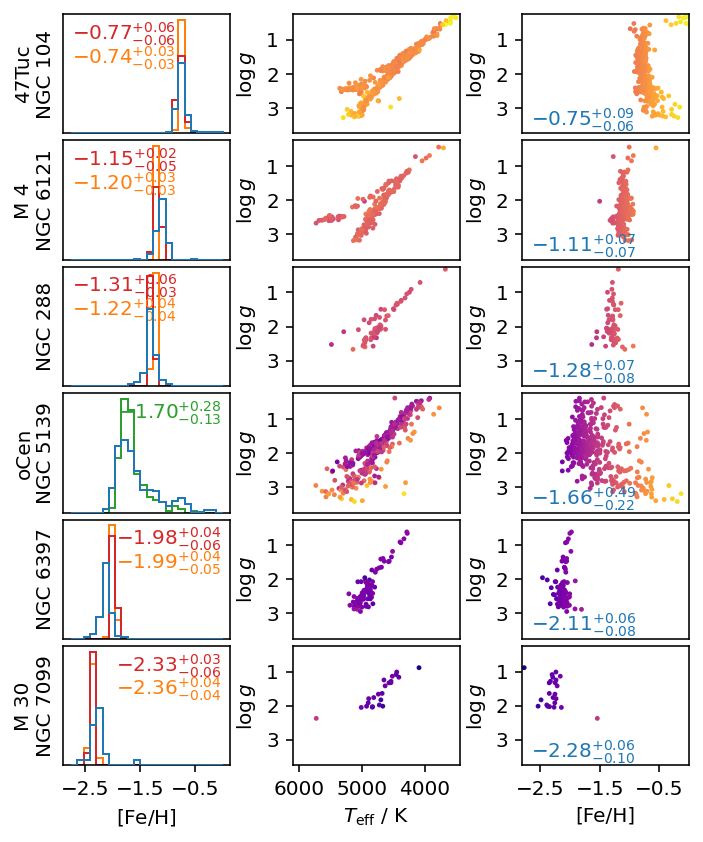

In [562]:
top10_cluster_by_feh = [
    'NGC_104_47Tuc',
    'NGC_6121_M_4',
    'NGC_288',
    'NGC_5139_oCen',
    'NGC_6397',
    'NGC_7099_M_30',
]

NGC_5139_oCen_JP10 = Table.read('../validation/literature_data/JohnsonPilachowski2010_ApJ_722_1373_OmegaCen_xmatch.fits')
Caretta09_Giraffe = Table.read('../validation/literature_data/Carretta2009_AandA_505_117_Giraffe.fits')
Caretta09_Uves = Table.read('../validation/literature_data/Carretta2009_AandA_505_139_UVES.fits')

f, gs = plt.subplots(len(top10_cluster_by_feh),3,figsize=(5,len(top10_cluster_by_feh)))

for gc_index, gc in enumerate(top10_cluster_by_feh):

    in_gc = (
        (dr4_gc['cluster']==gc) & 
        (dr4_gc['teff'] < 6000) &
        (dr4_gc['flag_sp'] < 2048)
#         ((dr4_gc['flag_sp']==0) | (dr4_gc['flag_sp']==2048))
    )
        
    ax = gs[gc_index,0]

    ngc = gc.split('_')
    if len(ngc) == 2:
        ax.set_ylabel(gc.replace('_',' '))
    else:
        ax.set_ylabel(" ".join(ngc[2:])+'\n'+" ".join(ngc[:2]))

    if gc_index != len(top10_cluster_by_feh)-1:
        ax.set_xticks([])
    else:
        ax.set_xlabel(r'$\mathrm{[Fe/H]}$')
        ax.set_xticks([-2.5,-1.5,-0.5])
    ax.set_yticks([])
    
    ax.hist(
        dr4_gc['fe_h'][in_gc],
        bins = np.linspace(-2.75,0.,25),
        histtype='step',density=1,
        label = 'GALAH DR4',color='C0',
        zorder=5
    )
    
    ngc = int(gc.split('_')[1]) 

    xpos = 0.95; ha = 'right'
    if ngc in [104,6121,288]:
        xpos = 0.05; ha = 'left'
    
    if ngc in Caretta09_Giraffe['NGC']:
        star_in_ngc = np.where(Caretta09_Giraffe['NGC']==ngc)[0]
        ax.hist(
            Caretta09_Giraffe['__FeI_H_'][star_in_ngc],
            bins = np.linspace(-2.75,-0.0,25),
            histtype='step',density=1,
            label = 'C+ (2009) Giraffe',color='C1'
        )
        perc = np.percentile(Caretta09_Giraffe['__FeI_H_'][star_in_ngc],q=[16,50,84])
        ax.text(xpos,0.75,r'$'+"{:.2f}".format(perc[1])+'_{-'+"{:.2f}".format(perc[1]-perc[0])+'}^{+'+"{:.2f}".format(perc[2]-perc[1])+'}$',transform=ax.transAxes,ha=ha,va='top',color='C1')
    
    if ngc in Caretta09_Uves['NGC']:
        star_in_ngc = np.where(Caretta09_Uves['NGC']==ngc)[0]
        ax.hist(
            Caretta09_Uves['__FeI_H_'][star_in_ngc],
            bins = np.linspace(-2.75,-0.0,25),
            histtype='step',density=1,
            label = 'C+ (2009) Uves',color='C3'
        )
        perc = np.percentile(Caretta09_Uves['__FeI_H_'][star_in_ngc],q=[16,50,84])
        ax.text(xpos,0.95,r'$'+"{:.2f}".format(perc[1])+'_{-'+"{:.2f}".format(perc[1]-perc[0])+'}^{+'+"{:.2f}".format(perc[2]-perc[1])+'}$',transform=ax.transAxes,ha=ha,va='top',color='C3')

    if gc == 'NGC_5139_oCen':
        ax.hist(
            NGC_5139_oCen_JP10['__Fe_H_'],
            bins = np.linspace(-2.75,-0.0,25),
            histtype='step',density=1,
            label = 'J&P (2010)', color='C2'
        )
        perc = np.percentile(NGC_5139_oCen_JP10['__Fe_H_'],q=[16,50,84])
        ax.text(0.95,0.95,r'$'+"{:.2f}".format(perc[1])+'_{-'+"{:.2f}".format(perc[1]-perc[0])+'}^{+'+"{:.2f}".format(perc[2]-perc[1])+'}$',transform=ax.transAxes,ha='right',va='top',color='C2')
        
    ax = gs[gc_index,1]
    ax.scatter(
        dr4_gc['teff'][in_gc],
        dr4_gc['logg'][in_gc],
        c = dr4_gc['fe_h'][in_gc],
        s = 2, cmap = 'plasma',
        vmin = -2.8, vmax = -0.0
    )
    ax.set_xlim(6100,3450)
    ax.set_ylim(3.75,0.25)
    ax.set_ylabel(r'$\log g$')
    

    if gc_index != len(top10_cluster_by_feh)-1:
        ax.set_xticks([])
    else:
        ax.set_xticks([4000,5000,6000])
        ax.set_xlabel(r'$T_\mathrm{eff}~/~\mathrm{K}$')
    
    ax = gs[gc_index,2]
    ax.scatter(
        dr4_gc['fe_h'][in_gc],
        dr4_gc['logg'][in_gc],
        c = dr4_gc['fe_h'][in_gc],
        s = 2, cmap = 'plasma',
        vmin = -2.8, vmax=0.0
    )
    ax.set_ylim(3.75,0.25)
    ax.set_xlim(-2.8, 0.0)
    ax.set_ylabel(r'$\log g$')
    
    ax.set_xticks([-2.5,-1.5,-0.5])
    
    perc = np.percentile(dr4_gc['fe_h'][in_gc],q=[16,50,84])
    ax.text(0.05,0.00,r'$'+"{:.2f}".format(perc[1])+'_{-'+"{:.2f}".format(perc[1]-perc[0])+'}^{+'+"{:.2f}".format(perc[2]-perc[1])+'}$',transform=ax.transAxes,ha='left',va='bottom',color='C0')

    if gc_index != len(top10_cluster_by_feh)-1:
        ax.set_xticks([])
    else:
#         ax.set_xticks([4000,5000,6000])
        ax.set_xlabel(r'[Fe/H]')

plt.tight_layout(w_pad=0,h_pad=0)
plt.savefig('figures/galah_dr4_allstar_globular_cluster_feh_comparison.png',dpi=200,bbox_inches='tight')
plt.show()
plt.close()

8192

## Dynamic overview

In [194]:
import galpy
#from galpy.potential import MWPotential2014 as pot
from galpy.potential.mwpotentials import McMillan17 as pot
from galpy.actionAngle import actionAngleStaeckel, actionAngleSpherical
from galpy.orbit import Orbit

# Reference values
#r_galactic_centre = 8.178*u.kpc # Gravity Collaboration, 2019, A&A, 625, 10
r_galactic_centre = 8.21*u.kpc # McMillan Potential, 2017
z_galactic_plane = 25.0*u.pc # Bland-Hawthorn & Gerhard, 2016, ARA&A, 54, 529

print('Reference frame:')
print('R_GC = '+str(r_galactic_centre)+' (McMillan, 2017, MNRAS, 465, 76)')
print('phi_GC = '+str(0*u.rad))
print('z_GC = '+str(z_galactic_plane)+' (Bland-Hawthorn & Gerhard, 2016, ARA&A, 54, 529)')

v_total_sun = (np.tan(6.379*u.mas)*r_galactic_centre/u.yr).to(u.km/u.s) # pm_l by Reid & Brunthaler 2004, ApJ, 616, 872
print('V_total_sun: = '+"{:.2f}".format(v_total_sun)+' (Reid & Brunthaler 2004, ApJ, 616, 872)')
v_peculiar = [11.1, 15.17, 7.25]*u.km/u.s # U and W from Schoenrich, Binney, Dehnen, 2010, MNRAS, 403, 1829, V so that V = V_total-V_sun
print('V_peculiar = ',(v_peculiar),' (U and W from Schoenrich, Binney, Dehnen, 2010, MNRAS, 403, 1829)')
print('V-component of V_peculiar = 15.17 km/s, instead of 12.24 km/s by Schoenrich et al. (2010), for matching v_circular')
v_circular = np.round(v_total_sun-v_peculiar[1],1)
print('V_circular = ',"{:.2f}".format(v_circular),' (McMillan, 2017, MNRAS, 465, 76)')

aAS = actionAngleStaeckel(
        pot   = pot,        #potential                                                                                                                                                                      
        delta = 0.45,       #focal length of confocal coordinate system                                                                                                                            
        c     = True        #use C code (for speed)                                                                                                                                                         
        )

# #(RA = 17:45:37.224 h:m:s, Dec = −28:56:10.23 deg) (Reid& Brunthaler 2004)

Reference frame:
R_GC = 8.21 kpc (McMillan, 2017, MNRAS, 465, 76)
phi_GC = 0.0 rad
z_GC = 25.0 pc (Bland-Hawthorn & Gerhard, 2016, ARA&A, 54, 529)
V_total_sun: = 248.27 km / s (Reid & Brunthaler 2004, ApJ, 616, 872)
V_peculiar =  [11.1  15.17  7.25] km / s  (U and W from Schoenrich, Binney, Dehnen, 2010, MNRAS, 403, 1829)
V-component of V_peculiar = 15.17 km/s, instead of 12.24 km/s by Schoenrich et al. (2010), for matching v_circular
V_circular =  233.10 km / s  (McMillan, 2017, MNRAS, 465, 76)


In [195]:
calculate_sun = True

if calculate_sun:
    sun = dict()

    # Create the Orbit instance
    o = Orbit(
        #ra, dec, dist, pm_ra, pm_dec, v_los
        vxvv=[0.*u.deg,0.*u.deg,0.*u.kpc,0.*u.mas/u.yr, 0.*u.mas/u.yr,0.*u.km/u.s],
        ro=r_galactic_centre,
        vo=v_circular,
        zo=z_galactic_plane,
        solarmotion=[-11.1, 15.17, 7.25]*u.km/u.s,
        #solarmotion='schoenrich',
        radec=True
    )

    #Galactocentric coordinates:
    sun['X_XYZ'] = o.helioX()#*u.kpc        
    sun['Y_XYZ'] = o.helioY()#*u.kpc
    sun['Z_XYZ'] = o.helioZ()#*u.kpc
    sun['U_UVW'] = o.U()#*u.km/u.s
    sun['V_UVW'] = o.V()#*u.km/u.s
    sun['W_UVW'] = o.W()#*u.km/u.s
    sun['R_Rzphi'] = o.R()#*u.kpc
    sun['phi_Rzphi'] = o.phi()#*u.rad
    sun['z_Rzphi'] = o.z()#*u.kpc
    sun['vR_Rzphi'] = o.vR()#*u.km/u.s
    sun['vT_Rzphi'] = o.vT()#*u.km/u.s        
    sun['vz_Rzphi'] = o.vz()#*u.km/u.s

    try:
        sun['J_R'], sun['L_Z'],sun['J_Z'], sun['omega_R'], sun['omega_phi'], sun['omega_z'], sun['angle_R'], sun['angle_phi'], sun['angle_z'] = aAS.actionsFreqsAngles(
            #R,vR,vT,z,vz[,phi]
            sun['R_Rzphi']*u.kpc,
            sun['vR_Rzphi']*u.km/u.s,
            sun['vT_Rzphi']*u.km/u.s,
            sun['z_Rzphi']*u.kpc,
            sun['vz_Rzphi']*u.km/u.s,
            sun['phi_Rzphi']*u.rad,
            ro=r_galactic_centre,vo=v_circular
        )
    except:
        sun['omega_R'] = [np.nan]
        sun['omega_phi'] = [np.nan]
        sun['omega_z'] = [np.nan]
        sun['angle_R'] = [np.nan]
        sun['angle_phi'] = [np.nan]
        sun['angle_z'] = [np.nan]
        try:
            sun['J_R'], sun['L_Z'],sun['J_Z'] = aAS(
            #R,vR,vT,z,vz[,phi]
            sun['R_Rzphi']*u.kpc,
            sun['vR_Rzphi']*u.km/u.s,
            sun['vT_Rzphi']*u.km/u.s,
            sun['z_Rzphi']*u.kpc,
            sun['vz_Rzphi']*u.km/u.s,
            sun['phi_Rzphi']*u.rad,
            ro=r_galactic_centre,vo=v_circular
        )
        except:
            sun['J_R'] = [np.nan]
            sun['L_Z'] = [np.nan]
            sun['J_Z'] = [np.nan]

    try:
        sun['ecc'], sun['zmax'], sun['R_peri'], sun['R_ap'] = aAS.EccZmaxRperiRap(
            #R,vR,vT,z,vz[,phi]
            sun['R_Rzphi']*u.kpc,
            sun['vR_Rzphi']*u.km/u.s,
            sun['vT_Rzphi']*u.km/u.s,
            sun['z_Rzphi']*u.kpc,
            sun['vz_Rzphi']*u.km/u.s,
            sun['phi_Rzphi']*u.rad,
            ro=r_galactic_centre,vo=v_circular
        )         
        sun['zmax']
        sun['R_peri']
        sun['R_peri']

    except:
        sun['ecc'] = [np.nan]
        sun['zmax'] = [np.nan]
        sun['R_peri'] = [np.nan]
        sun['R_ap'] = [np.nan]

    sun['Energy'] = o.E(pot=pot,ro=r_galactic_centre,vo=v_circular,zo=z_galactic_plane)

    print('Solar values:')
    print('X,Y,Z: '+"{:.2f}".format(sun['X_XYZ'])+' '+"{:.2f}".format(sun['Y_XYZ'])+' '+"{:.2f}".format(sun['Z_XYZ']))
    print('U,V,W: '+"{:.2f}".format(sun['U_UVW'])+' '+"{:.2f}".format(sun['V_UVW'])+' '+"{:.2f}".format(sun['W_UVW']))
    print('R,phi,z: '+"{:.2f}".format(sun['R_Rzphi'])+' '+"{:.2f}".format(sun['phi_Rzphi'])+' '+"{:.2f}".format(sun['z_Rzphi']))
    print('vR,vT,vz: '+"{:.2f}".format(sun['vR_Rzphi'])+' '+"{:.2f}".format(sun['vT_Rzphi'])+' '+"{:.2f}".format(sun['vz_Rzphi']))
    print('J_R,L_Z,J_Z: '+"{:.2f}".format(sun['J_R'][0])+' '+"{:.2f}".format(sun['L_Z'][0])+' '+"{:.2f}".format(sun['J_Z'][0]))
    print('Omega R/phi/z: '+"{:.2f}".format(sun['omega_R'][0])+' '+"{:.2f}".format(sun['omega_phi'][0])+' '+"{:.2f}".format(sun['omega_z'][0]))
    print('Angles R/phi/z: '+"{:.2f}".format(sun['angle_R'][0])+' '+"{:.2f}".format(sun['angle_phi'][0])+' '+"{:.2f}".format(sun['angle_z'][0]))
    print('ecc, zmax, R_peri, R_apo: '+"{:.2f}".format(sun['ecc'][0])+' '+"{:.2f}".format(sun['zmax'][0])+' '+"{:.2f}".format(sun['R_peri'][0])+' '+"{:.2f}".format(sun['R_ap'][0]))
    print('Energy: '+"{:.2f}".format(sun['Energy']))

Solar values:
X,Y,Z: -0.00 -0.00 -0.00
U,V,W: 0.00 0.00 0.00
R,phi,z: 8.21 0.00 0.03
vR,vT,vz: -11.10 248.27 7.25
J_R,L_Z,J_Z: 7.73 2038.30 0.37
Omega R/phi/z: 38.00 27.07 68.36
Angles R/phi/z: 5.86 0.05 0.35
ecc, zmax, R_peri, R_apo: 0.07 0.11 8.15 9.43
Energy: -152783.43


In [187]:
galah_dr4_dynamics = Table.read('../catalogs/galah_dr4_vac_dynamics.fits')

In [188]:
gcs = Table.read('../auxiliary_information/VasilievBaumgardt_2021_MNRAS_505_5978_cluster_source_id_memberprob0p7.fits')
gcs['gaiadr3_source_id'] = gcs['source_id']
gcs_dr4 = join(gcs, galah_dr4_dynamics, keys='gaiadr3_source_id')
gcs_dr4 = gcs_dr4[np.isfinite(gcs_dr4['L_Z'])]

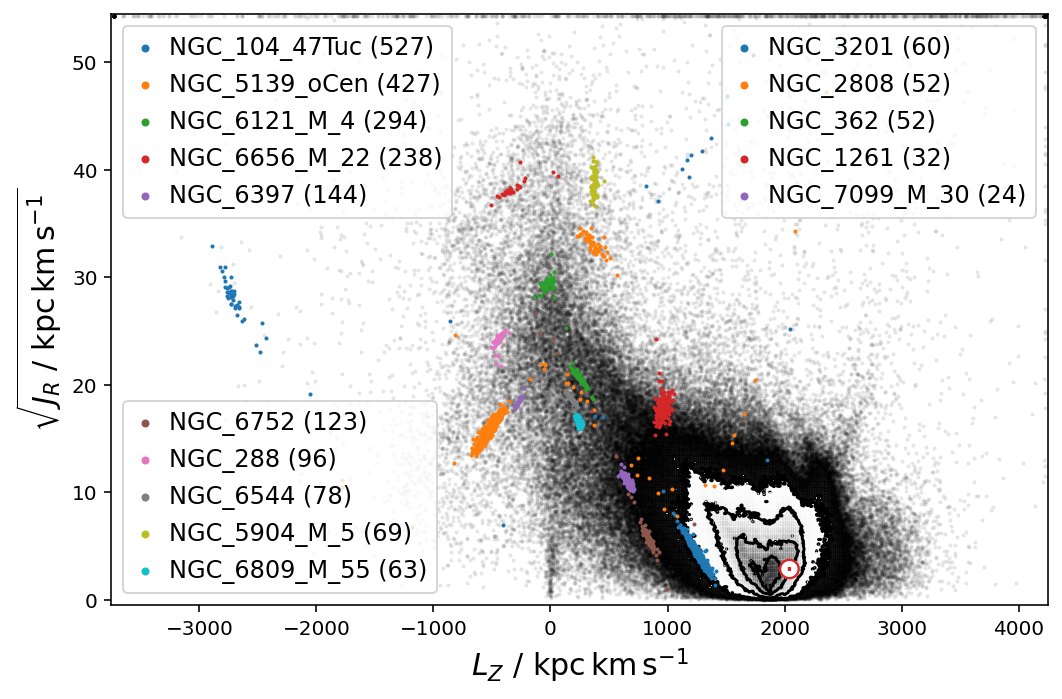

In [237]:
f,ax = plt.subplots(figsize=(7.5,5))

use = np.isfinite(output['L_Z'])
corner.hist2d(
    (galah_dr4_dynamics['L_Z'][use]).clip(min=-3725,max=4225),
    (np.sqrt(galah_dr4_dynamics['J_R'][use])).clip(min=0,max=54.25),
    range = [(-3750,4250),(-0.5,54.5)],
    bins = 500,
    ax=ax,
    zorder=1
)
ax.set_xlabel(r'$L_Z~/~\mathrm{kpc\,km\,s^{-1}}$',fontsize=15)
ax.set_ylabel(r'$\sqrt{J_R~/~\mathrm{kpc\,km\,s^{-1}}}$',fontsize=15)

gcs = Table()
gcs['cluster'], gcs['counts'] = np.unique(gcs_dr4['cluster'],return_counts=True)
gcs.sort('counts',reverse=True)

circle = mpatches.Ellipse((sun['L_Z'][0],np.sqrt(sun['J_R'][0])), 140, 1.6, color='white',fill=True, zorder=3)
ax.add_patch(circle)
ax.text(sun['L_Z'][0]-10,np.sqrt(sun['J_R'][0]), r'$\odot$', fontsize=16, fontweight='bold', ha='center', va='center', color='C3', zorder=4)

scatter_plots = []

nr = 0
for gc in gcs['cluster']:
    in_cluster = (gcs_dr4['cluster'] == gc) & np.isfinite(gcs_dr4['L_Z'])
    if len(gcs_dr4['cluster'][in_cluster]) > 20:
        scatter_plots.append(ax.scatter(
            gcs_dr4['L_Z'][in_cluster],
            np.sqrt(gcs_dr4['J_R'][in_cluster]),
            label = gc + ' ('+str(len(gcs_dr4['cluster'][in_cluster]))+')',
            s = 1, zorder=2
        ))
        nr +=1

scatter_plots_left = scatter_plots[:5]
scatter_plots_left2 = scatter_plots[5:10]
scatter_plots_right = scatter_plots[10:]

# Create legends
legend1 = ax.legend(handles=scatter_plots_left, loc='upper left', fontsize=12, handlelength=1, markerscale = 3, handletextpad=0.5)
ax.add_artist(legend1)
legend2 = ax.legend(handles=scatter_plots_left2, loc='lower left', fontsize=12, handlelength=1, markerscale = 3, handletextpad=0.5)
ax.add_artist(legend2)
legend3 = ax.legend(handles=scatter_plots_right, loc='upper right', fontsize=12, handlelength=1, markerscale = 3, handletextpad=0.5)

plt.tight_layout()
plt.savefig('figures/galah_dr4_lz_jr_with_gcs.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

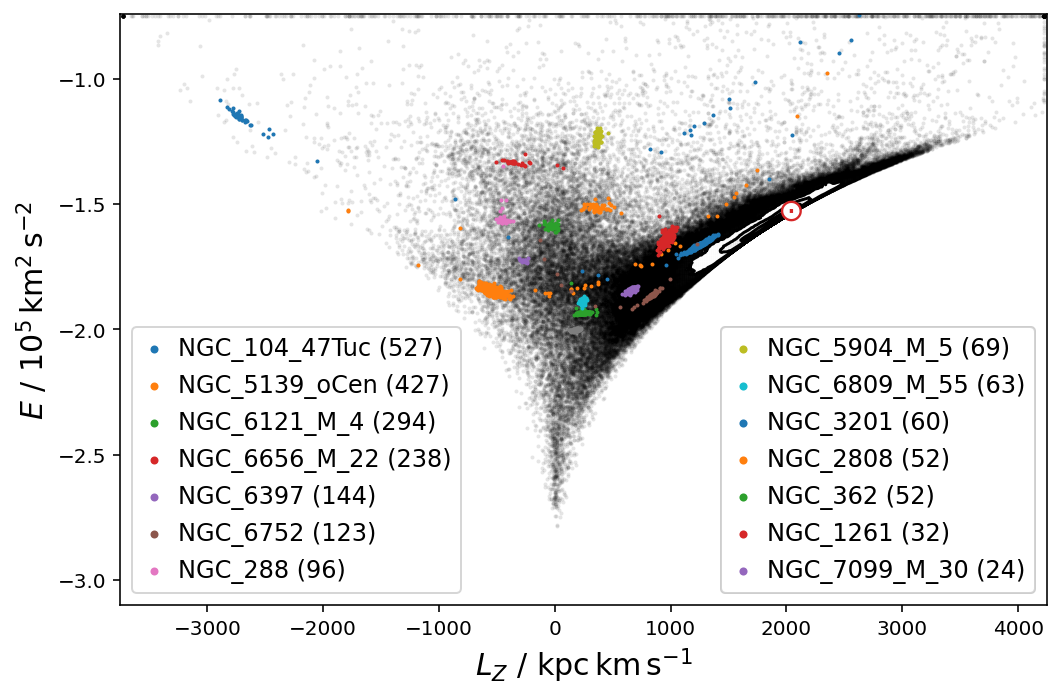

In [249]:
f,ax = plt.subplots(figsize=(7.5,5))

use = np.isfinite(output['Energy'])
corner.hist2d(
    (galah_dr4_dynamics['L_Z'][use]).clip(min=-3725,max=4225),
    (galah_dr4_dynamics['Energy'][use]/10**5).clip(min=-3.0,max=-0.75),
    range = [(-3750,4250),(-3.1,-0.74)],
    bins = 500,
    ax=ax,
    zorder=1
)
ax.set_xlabel(r'$L_Z~/~\mathrm{kpc\,km\,s^{-1}}$',fontsize=15)
ax.set_ylabel(r'$E~/~10^{5}\,\mathrm{km^2\,s^{-2}}$',fontsize=15)

gcs = Table()
gcs['cluster'], gcs['counts'] = np.unique(gcs_dr4['cluster'],return_counts=True)
gcs.sort('counts',reverse=True)

circle = mpatches.Ellipse((sun['L_Z'][0],sun['Energy']/10**5), 140, 0.07, color='white',fill=True, zorder=3)
ax.add_patch(circle)
ax.text(sun['L_Z'][0]-10,sun['Energy']/10**5, r'$\odot$', fontsize=16, fontweight='bold', ha='center', va='center', color='C3', zorder=4)

scatter_plots = []

nr = 0
for gc in gcs['cluster']:
    in_cluster = (gcs_dr4['cluster'] == gc) & np.isfinite(gcs_dr4['L_Z'])
    if len(gcs_dr4['cluster'][in_cluster]) > 20:
        scatter_plots.append(ax.scatter(
            gcs_dr4['L_Z'][in_cluster],
            gcs_dr4['Energy'][in_cluster]/10**5,
            label = gc + ' ('+str(len(gcs_dr4['cluster'][in_cluster]))+')',
            s = 1, zorder=2
        ))
        nr +=1

scatter_plots_left = scatter_plots[:7]
scatter_plots_left2 = scatter_plots[8:]

# Create legends
legend1 = ax.legend(handles=scatter_plots_left, loc='lower left', fontsize=12, handlelength=1, markerscale = 3, handletextpad=0.5)
ax.add_artist(legend1)
legend2 = ax.legend(handles=scatter_plots_left2, loc='lower right', fontsize=12, handlelength=1, markerscale = 3, handletextpad=0.5)
ax.add_artist(legend2)

plt.tight_layout()
plt.savefig('figures/galah_dr4_lz_e_with_gcs.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()